In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.patches import Patch

import os, json, joblib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram


from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment


In [37]:
df = pd.read_csv("Country-data.csv")

In [38]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [40]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [41]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [42]:
numeric_cols = df.select_dtypes(include= np.number).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

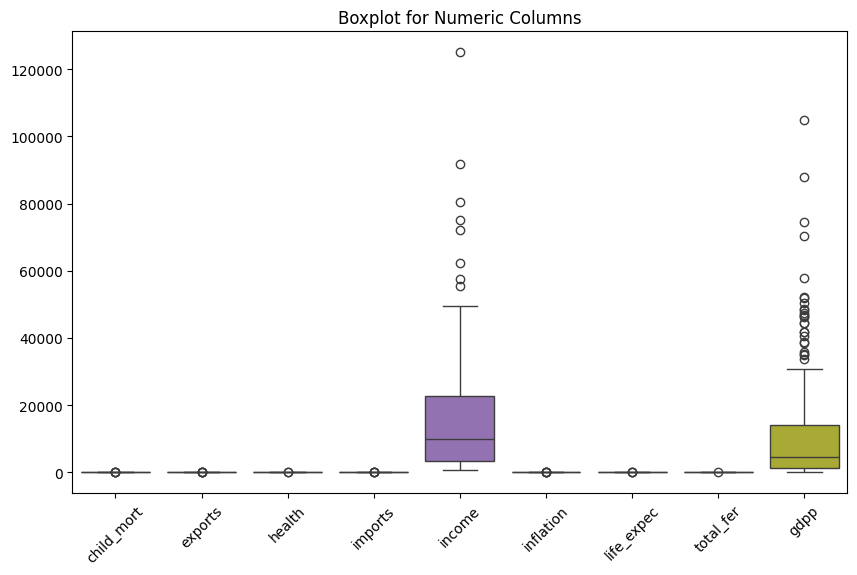

In [43]:
# Boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

In [44]:
# Loop through each numeric column and cap outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

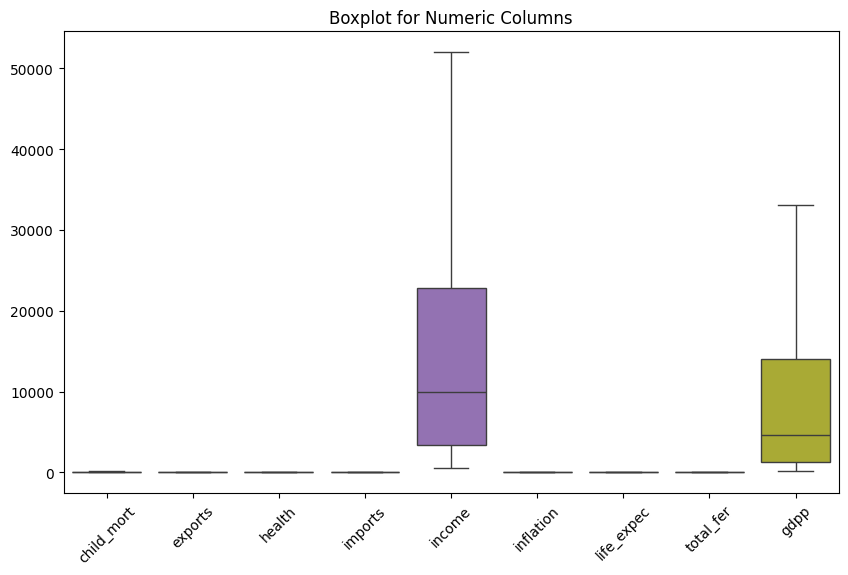

In [45]:
# Boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

In [46]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [47]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [48]:
# df['Trade_gap']= df['exports'] - df['imports']
# df['Trade openess'] = df['exports'] + df['imports']

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.698204,38.443293,2.6000,8.250,19.30,62.10,142.8750
exports,167.0,39.543557,21.301318,0.1090,23.800,35.00,51.35,92.6750
health,167.0,6.792575,2.668103,1.8100,4.920,6.32,8.60,14.1200
imports,167.0,45.862071,20.338815,0.0659,30.200,43.30,58.75,101.5750
income,167.0,15921.574850,15207.197459,609.0000,3355.000,9960.00,22800.00,51967.5000
inflation,167.0,7.065066,6.704968,-4.2100,1.810,5.39,10.75,24.1600
life_expec,167.0,70.663772,8.522535,48.0500,65.300,73.10,76.80,82.8000
total_fer,167.0,2.945075,1.505564,1.1500,1.795,2.41,3.88,7.0075
gdpp,167.0,10351.281437,11612.044330,231.0000,1330.000,4660.00,14050.00,33130.0000


In [50]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

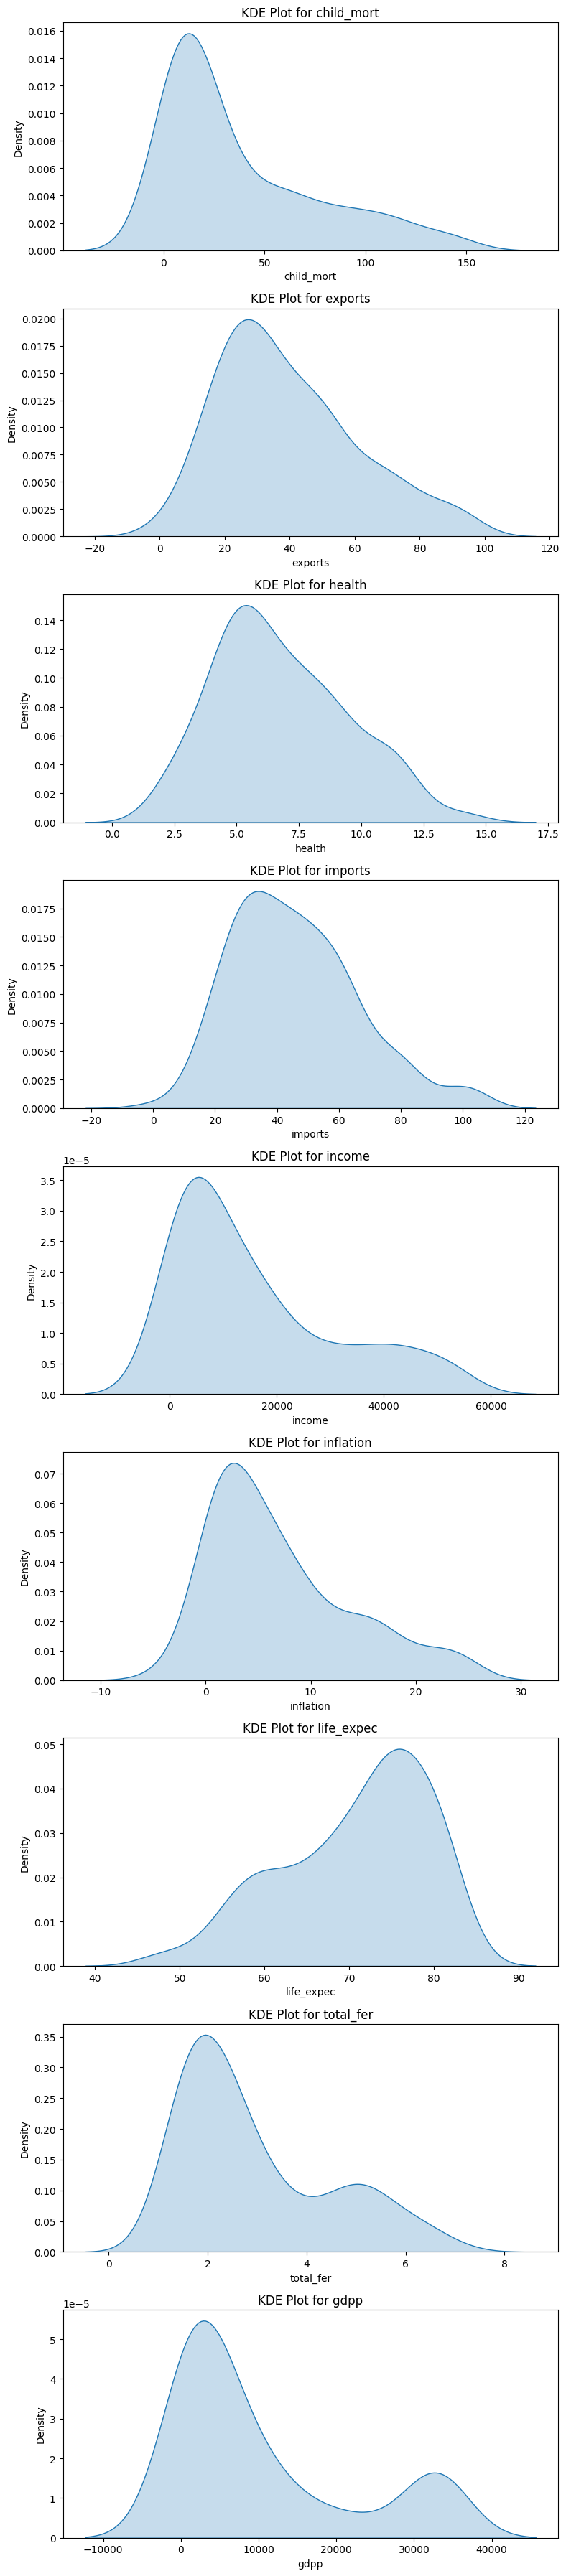

In [58]:
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 4*len(numeric_cols)))

for ax, col in zip(axes, numeric_cols):
    sns.kdeplot(df[col], fill=True, ax=ax)
    ax.set_title(f"KDE Plot for {col}")

plt.tight_layout()
plt.show()


In [59]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

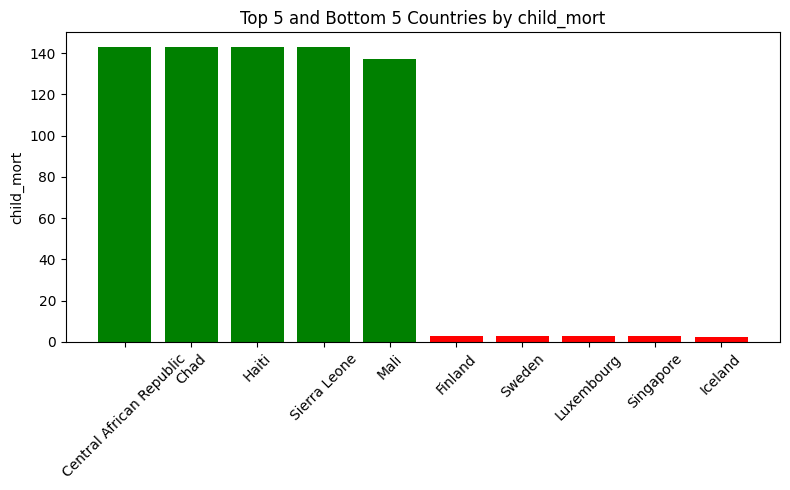

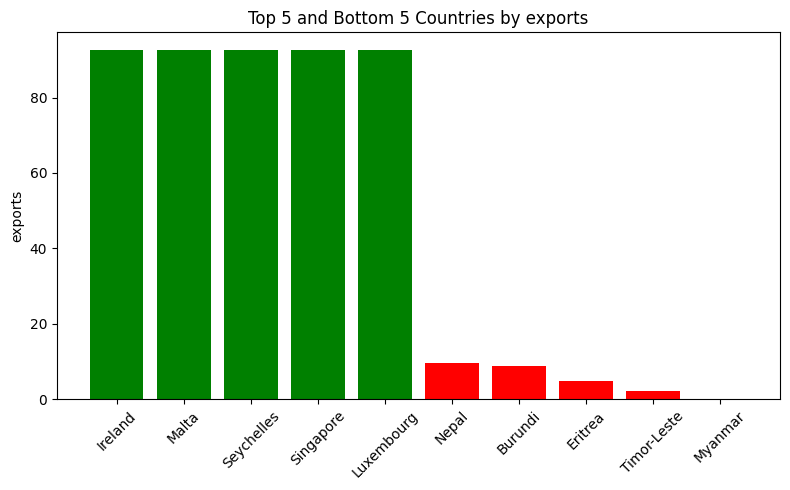

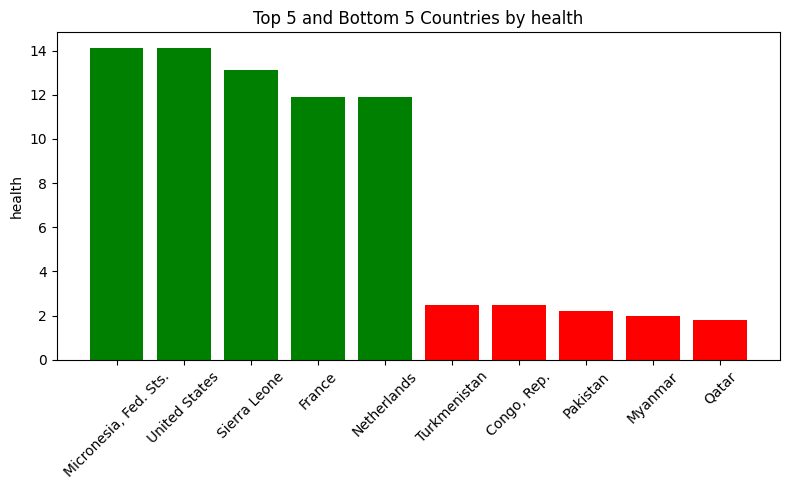

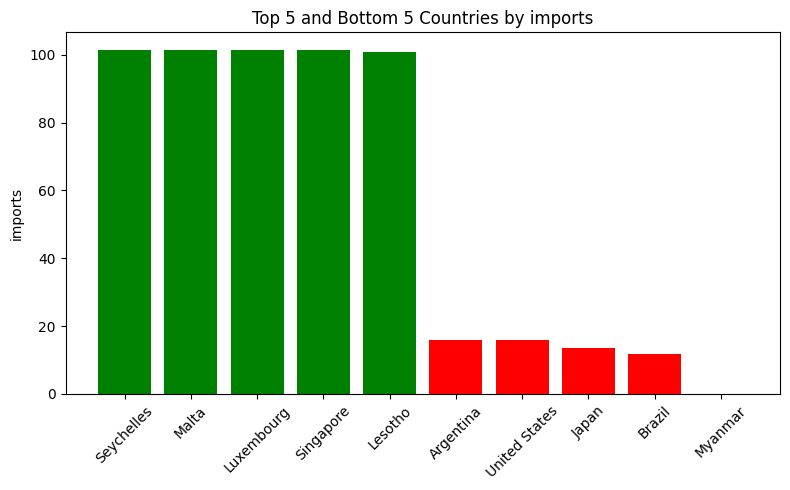

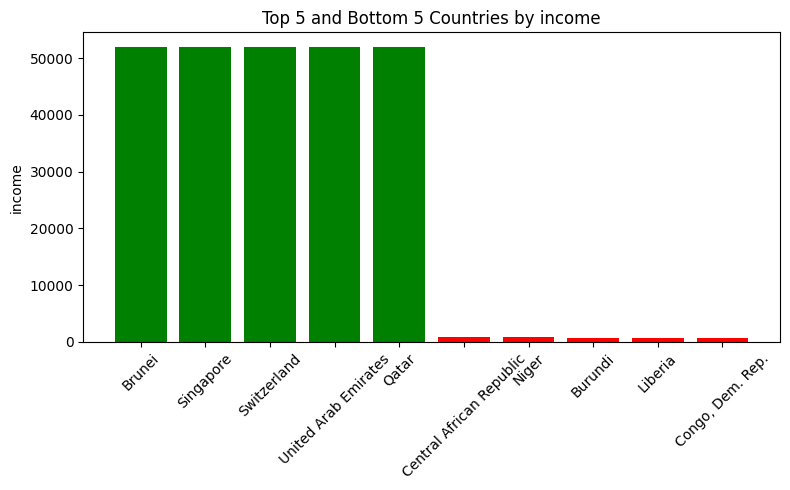

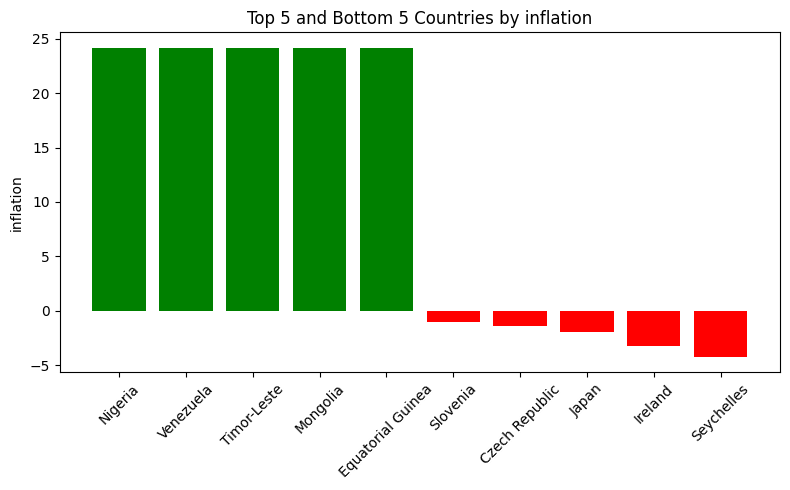

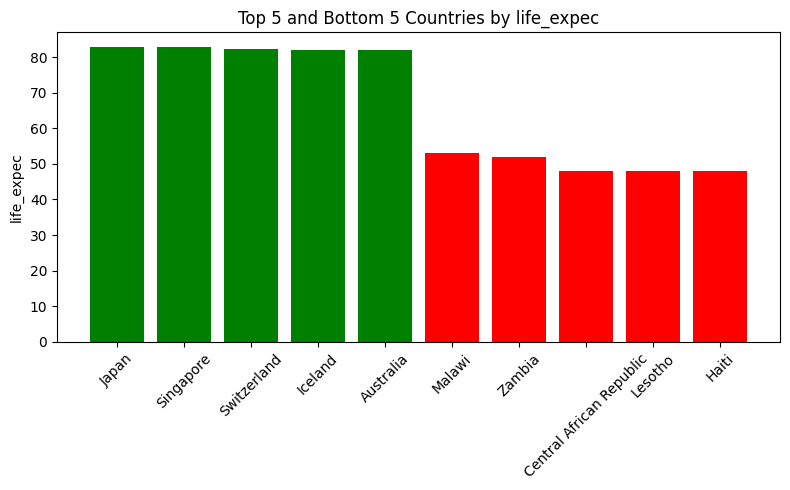

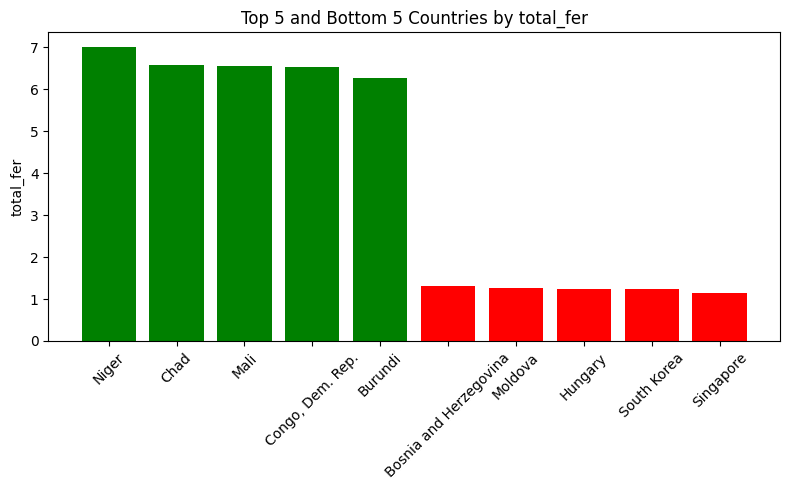

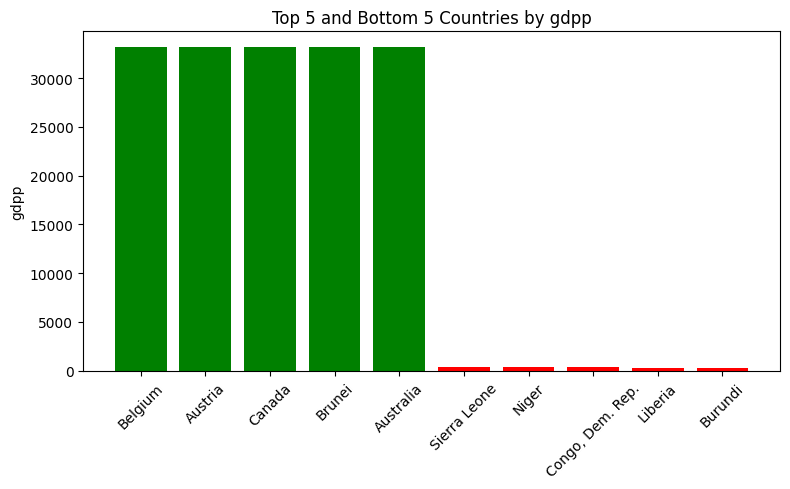

In [60]:
for col in numeric_cols:
    df_sorted = df.sort_values(by=col, ascending=False)

    top5 = df_sorted.head(5)
    bottom5 = df_sorted.tail(5)
    top_bottom = pd.concat([top5, bottom5])

    plt.figure(figsize=(8, 5))
    plt.bar(top_bottom['country'], top_bottom[col], color=['green']*5 + ['red']*5)
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.title(f"Top 5 and Bottom 5 Countries by {col}")
    plt.tight_layout()
    plt.show()

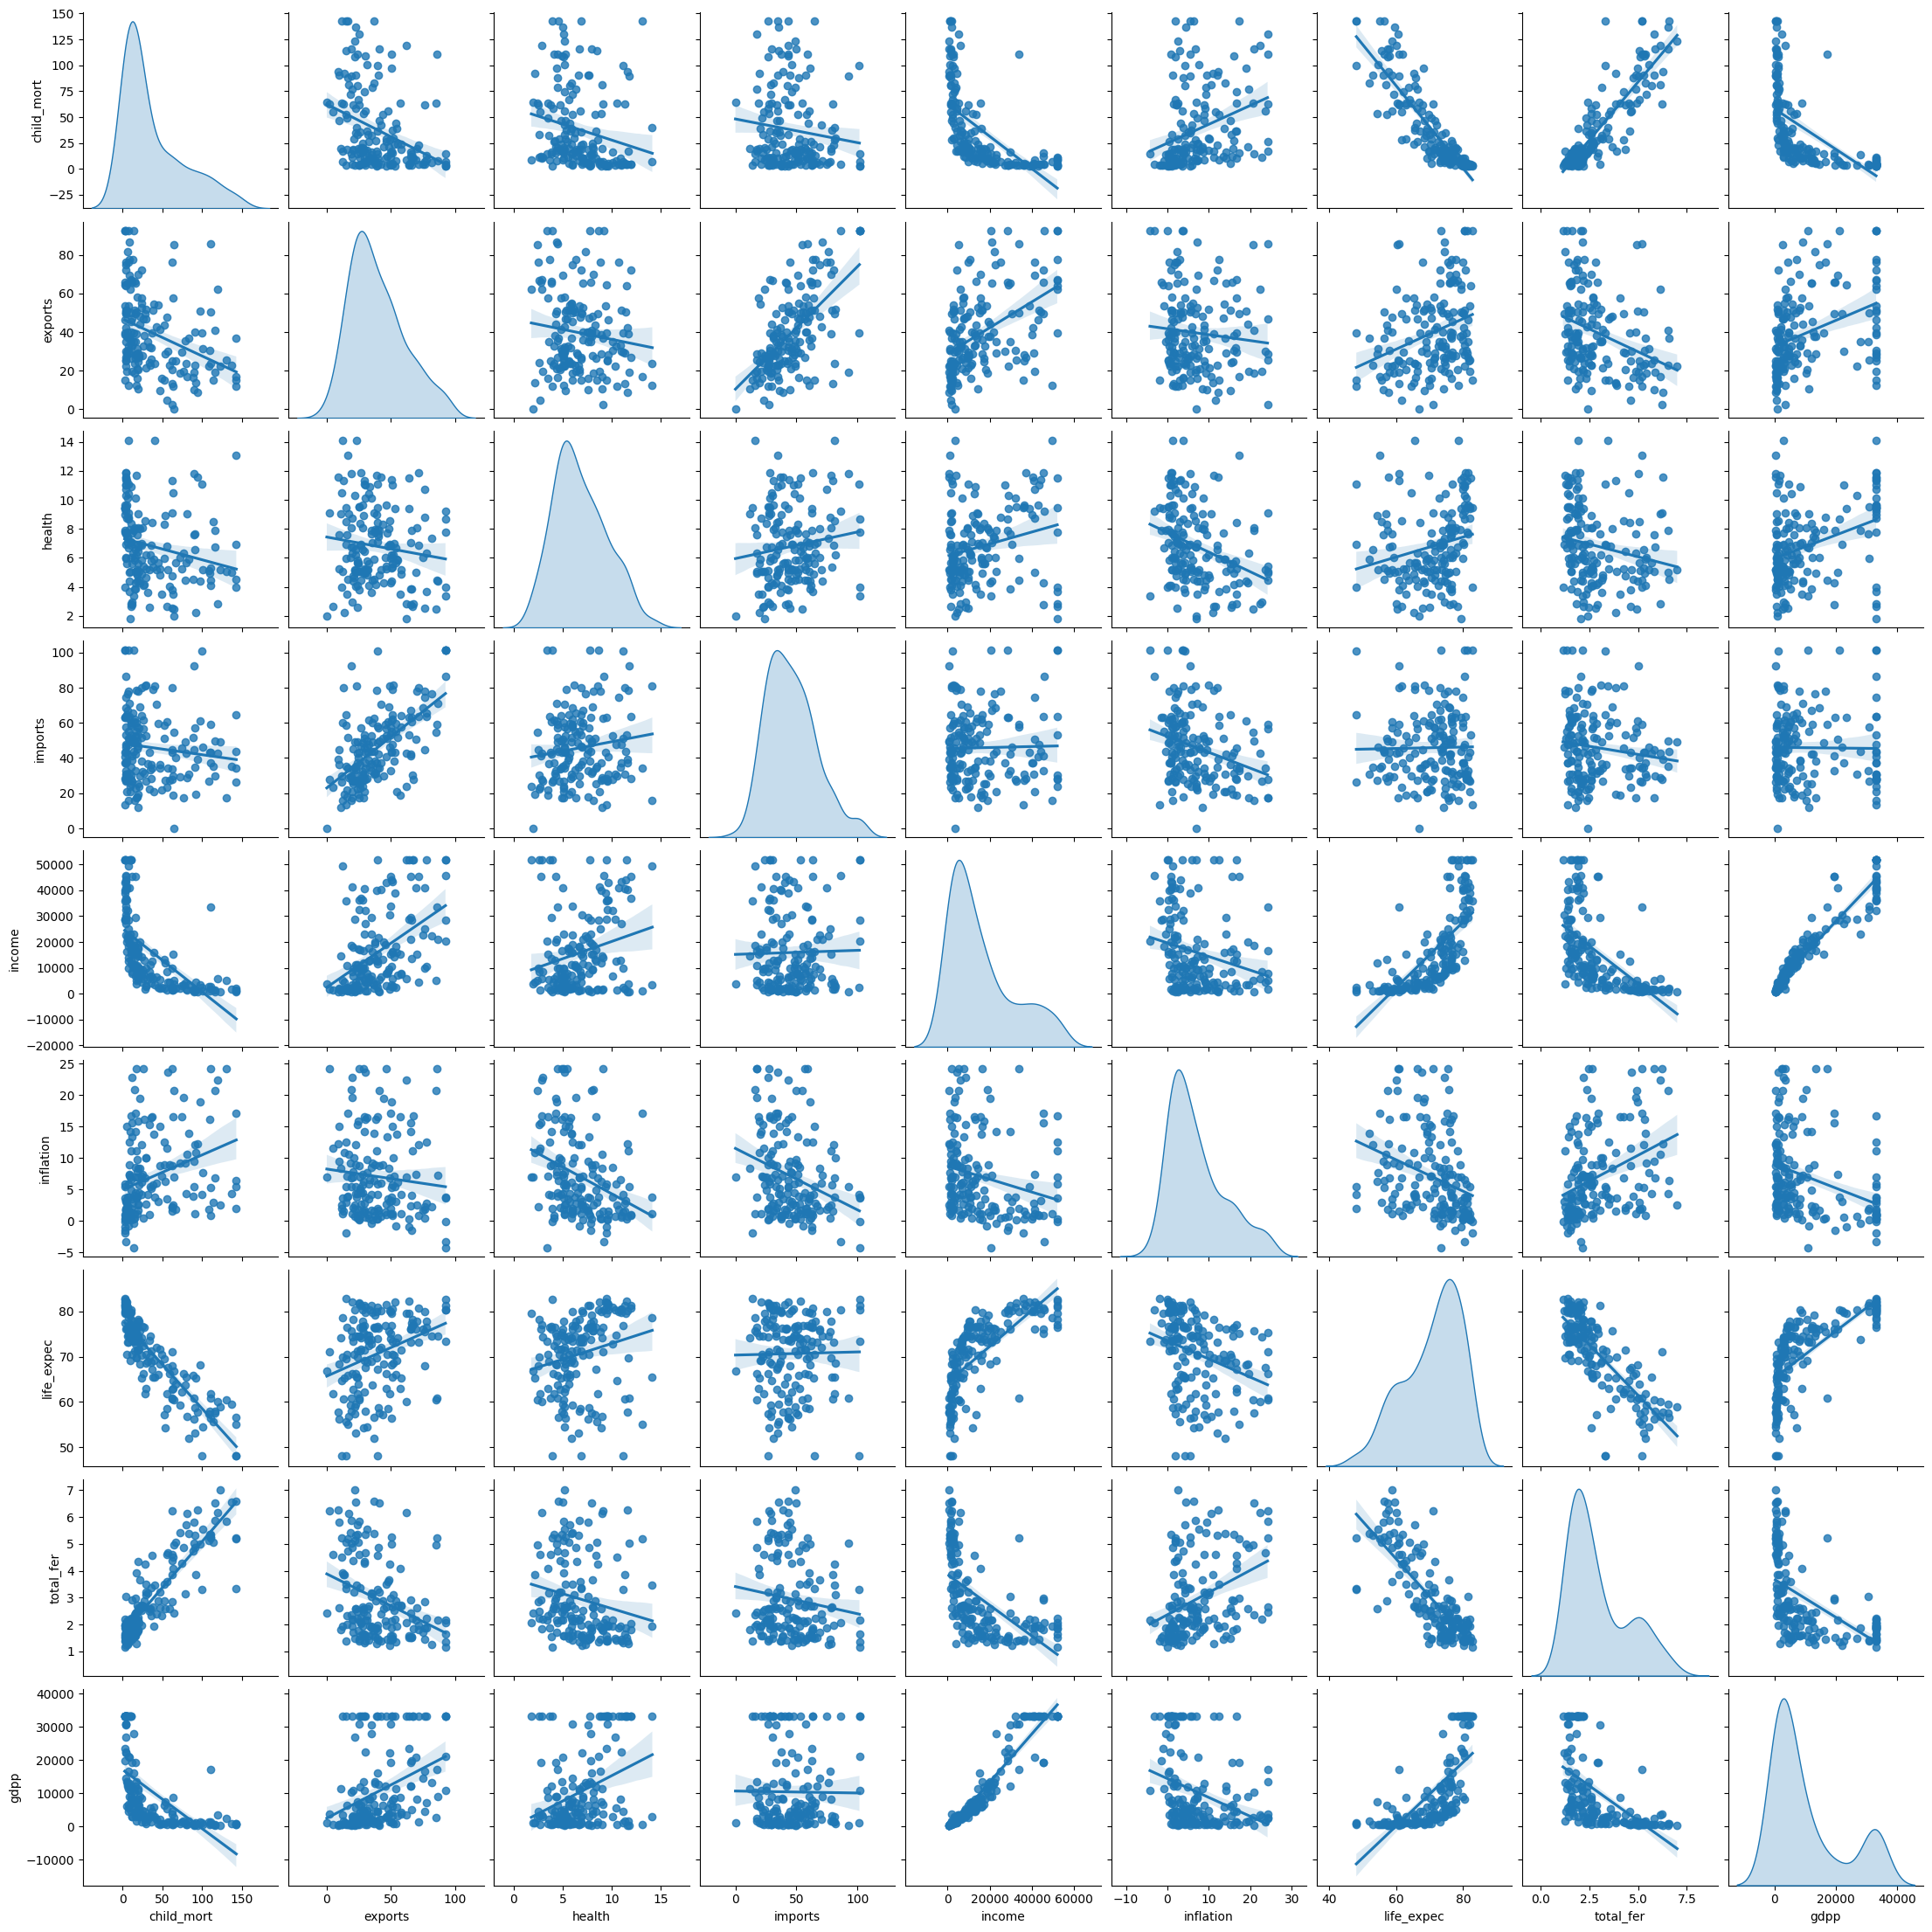

In [65]:
sns.pairplot(df[numeric_cols], kind='reg', diag_kind='kde')

<Axes: >

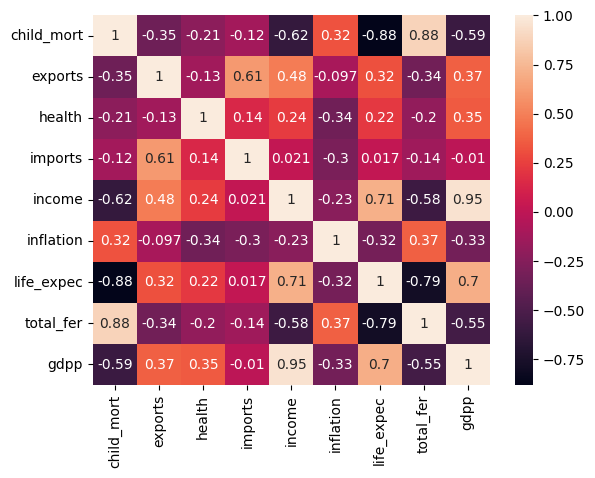

In [66]:
sns.heatmap(df[numeric_cols].corr(),annot=True)

In [67]:
# Step 1: Split into high and low health spending groups (using median as cutoff)
median_health = df['health'].median()
high_spending = df[df['health'] > median_health]['life_expec']
low_spending = df[df['health'] <= median_health]['life_expec']

# Step 2: Perform Welch’s t-test (does not assume equal variances)
t_stat, p_val = stats.ttest_ind(high_spending, low_spending, equal_var=False)

# Step 3: Output results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Step 4: Interpretation
if p_val < 0.05:
    print("Result: Statistically significant difference in life expectancy between groups.")
else:
    print("Result: No statistically significant difference in life expectancy between groups.")

T-statistic: 3.2324
P-value: 0.0015
Result: Statistically significant difference in life expectancy between groups.


In [68]:
# ----- 1. Correlation Analysis -----
corr_coeff, corr_p_val = stats.pearsonr(df['total_fer'], df['income'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {corr_coeff:.4f}")
print(f"P-value: {corr_p_val:.4f}")
if corr_p_val < 0.05:
    print("Result: Statistically significant correlation.")
else:
    print("Result: No statistically significant correlation.")

print("\n" + "-"*50 + "\n")

# ----- 2. T-test -----
# Split into high vs low fertility using median as cutoff
median_fertility = df['total_fer'].median()
high_fertility_income = df[df['total_fer'] > median_fertility]['income']
low_fertility_income = df[df['total_fer'] <= median_fertility]['income']

t_stat, t_p_val = stats.ttest_ind(low_fertility_income, high_fertility_income, equal_var=False)

print("T-test Analysis:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {t_p_val:.4f}")
if t_p_val < 0.05:
    print("Result: Statistically significant difference in income between high and low fertility groups.")
else:
    print("Result: No statistically significant difference in income between high and low fertility groups.")

# ----- 3. Means for clarity -----
print("\nMean Income (High Fertility):", high_fertility_income.mean())
print("Mean Income (Low Fertility):", low_fertility_income.mean())

Correlation Analysis:
Pearson correlation coefficient: -0.5791
P-value: 0.0000
Result: Statistically significant correlation.

--------------------------------------------------

T-test Analysis:
T-statistic: 9.6216
P-value: 0.0000
Result: Statistically significant difference in income between high and low fertility groups.

Mean Income (High Fertility): 6721.134146341464
Mean Income (Low Fertility): 24797.29411764706


In [69]:
# ----- 1. Correlation Analysis -----
# Using Pearson (linear relationship). Use Spearman if you suspect a monotonic but non-linear relationship.
pearson_corr, pearson_p = stats.pearsonr(df['income'], df['child_mort'])
spearman_corr, spearman_p = stats.spearmanr(df['income'], df['child_mort'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")

if pearson_p < 0.05:
    print("Pearson: Statistically significant relationship.")
else:
    print("Pearson: No statistically significant relationship.")

if spearman_p < 0.05:
    print("Spearman: Statistically significant relationship.")
else:
    print("Spearman: No statistically significant relationship.")

print("\n" + "-"*50 + "\n")

# ----- 2. T-test -----
median_income = df['income'].median()
high_income_mortality = df[df['income'] > median_income]['child_mort']
low_income_mortality = df[df['income'] <= median_income]['child_mort']

t_stat, p_val = stats.ttest_ind(low_income_mortality, high_income_mortality, equal_var=False)

print("T-test Analysis:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Statistically significant difference in child mortality between high- and low-income groups.")
else:
    print("Result: No statistically significant difference in child mortality between groups.")

# ----- 3. Means for clarity -----
print("\nMean Child Mortality (High Income):", high_income_mortality.mean())
print("Mean Child Mortality (Low Income):", low_income_mortality.mean())

Correlation Analysis:
Pearson correlation coefficient: -0.6177, P-value: 0.0000
Spearman correlation coefficient: -0.8671, P-value: 0.0000
Pearson: Statistically significant relationship.
Spearman: Statistically significant relationship.

--------------------------------------------------

T-test Analysis:
T-statistic: 10.6597, P-value: 0.0000
Result: Statistically significant difference in child mortality between high- and low-income groups.

Mean Child Mortality (High Income): 13.13734939759036
Mean Child Mortality (Low Income): 61.966666666666676


In [70]:
# ----- 1. Correlation Analysis -----
# Pearson: Linear relationship
pearson_corr, pearson_p = stats.pearsonr(df['inflation'], df['gdpp'])
# Spearman: Monotonic relationship (non-linear safe)
spearman_corr, spearman_p = stats.spearmanr(df['inflation'], df['gdpp'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")

if pearson_p < 0.05:
    print("Pearson: Statistically significant relationship.")
else:
    print("Pearson: No statistically significant relationship.")

if spearman_p < 0.05:
    print("Spearman: Statistically significant relationship.")
else:
    print("Spearman: No statistically significant relationship.")

print("\n" + "-"*50 + "\n")

# ----- 2. T-test -----
median_inflation = df['inflation'].median()
high_inflation_gdpp = df[df['inflation'] > median_inflation]['gdpp']
low_inflation_gdpp = df[df['inflation'] <= median_inflation]['gdpp']

t_stat, p_val = stats.ttest_ind(low_inflation_gdpp, high_inflation_gdpp, equal_var=False)

print("T-test Analysis:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Statistically significant difference in GDP per capita between high- and low-inflation countries.")
else:
    print("Result: No statistically significant difference in GDP per capita between groups.")

# ----- 3. Means for clarity -----
print("\nMean GDP per capita (High Inflation):", high_inflation_gdpp.mean())
print("Mean GDP per capita (Low Inflation):", low_inflation_gdpp.mean())

Correlation Analysis:
Pearson correlation coefficient: -0.3286, P-value: 0.0000
Spearman correlation coefficient: -0.3915, P-value: 0.0000
Pearson: Statistically significant relationship.
Spearman: Statistically significant relationship.

--------------------------------------------------

T-test Analysis:
T-statistic: 4.4249, P-value: 0.0000
Result: Statistically significant difference in GDP per capita between high- and low-inflation countries.

Mean GDP per capita (High Inflation): 6565.325301204819
Mean GDP per capita (Low Inflation): 14092.166666666666


In [71]:
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [72]:

np.random.seed(42)

# ---- Your project root (Windows path) ----
PROJECT_ROOT = r"D:\data\Scaler (modified)\Portfolio Project\Code"
MODEL_DIR = os.path.join(PROJECT_ROOT, "app", "model")
os.makedirs(MODEL_DIR, exist_ok=True)

# Quick sanity: show where artifacts will be written
MODEL_DIR


'D:\\data\\Scaler (modified)\\Portfolio Project\\Code\\app\\model'

In [73]:
# ==== 1) Prepare data ====
# Assumes df is already defined (per your df.info())
assert "df" in globals(), "This notebook expects a pandas DataFrame named `df`."

id_col = "country"

# Exclude only the ID (country) from clustering
exclude_cols = [id_col]
X = df.drop(columns=[c for c in exclude_cols if c in df.columns], errors="ignore")
num_cols = X.select_dtypes(include=np.number).columns.tolist()

preproc = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),   # standardization (population std)
])
X_std = preproc.fit_transform(X[num_cols])

countries = df[id_col].to_numpy() if id_col in df.columns else np.arange(X_std.shape[0])

len(num_cols), num_cols[:5]


(9, ['child_mort', 'exports', 'health', 'imports', 'income'])

Text(0.5, 1.0, 'KMeans Silhouette')

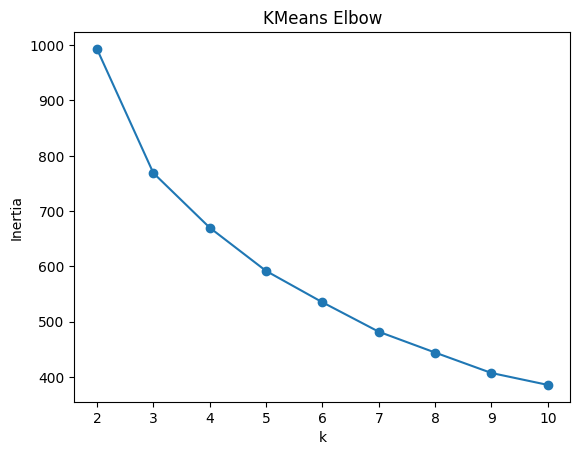

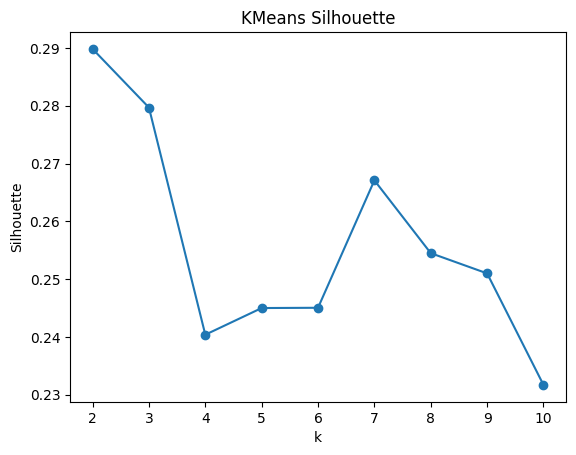

In [74]:
# ==== 2) K-Means: choose k ====
ks = range(2, 11)
inertia, sil_kmeans = [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels_k = km.fit_predict(X_std)
    inertia.append(km.inertia_)
    sil_kmeans.append(silhouette_score(X_std, labels_k))


# KMeans Elbow
plt.figure()
plt.plot(list(ks), inertia, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("KMeans Elbow")

# KMeans Silhouette
plt.figure()
plt.plot(list(ks), sil_kmeans, marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("KMeans Silhouette")

In [75]:


best_k = ks[int(np.argmax(sil_kmeans))]
km_final = KMeans(n_clusters=best_k, n_init=50, random_state=42)
kmeans_labels = km_final.fit_predict(X_std)

best_k, max(sil_kmeans)


(2, np.float64(0.2898395153574449))

In [76]:
Z = linkage(X_std, method="ward")  # dendrogram
sil_h = []
for k in ks:
    ac = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels_h = ac.fit_predict(X_std)
    sil_h.append(silhouette_score(X_std, labels_h))

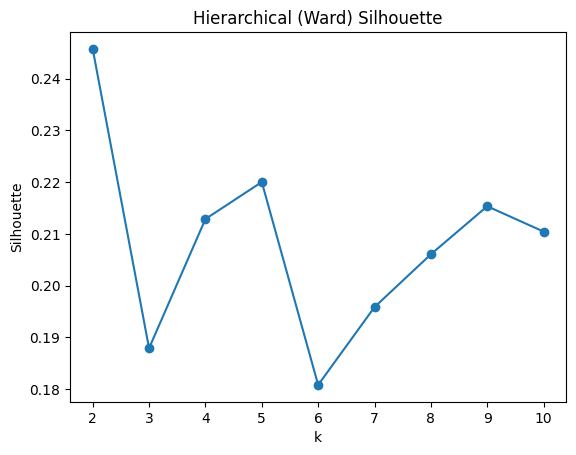

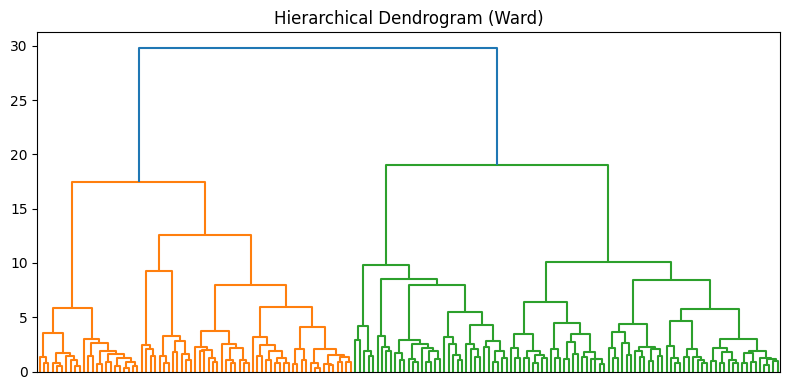

In [77]:
# Hierarchical Silhouette
plt.figure()
plt.plot(list(ks), sil_h, marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("Hierarchical (Ward) Silhouette")

# Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, no_labels=True, count_sort=True)
plt.title("Hierarchical Dendrogram (Ward)")
plt.tight_layout()

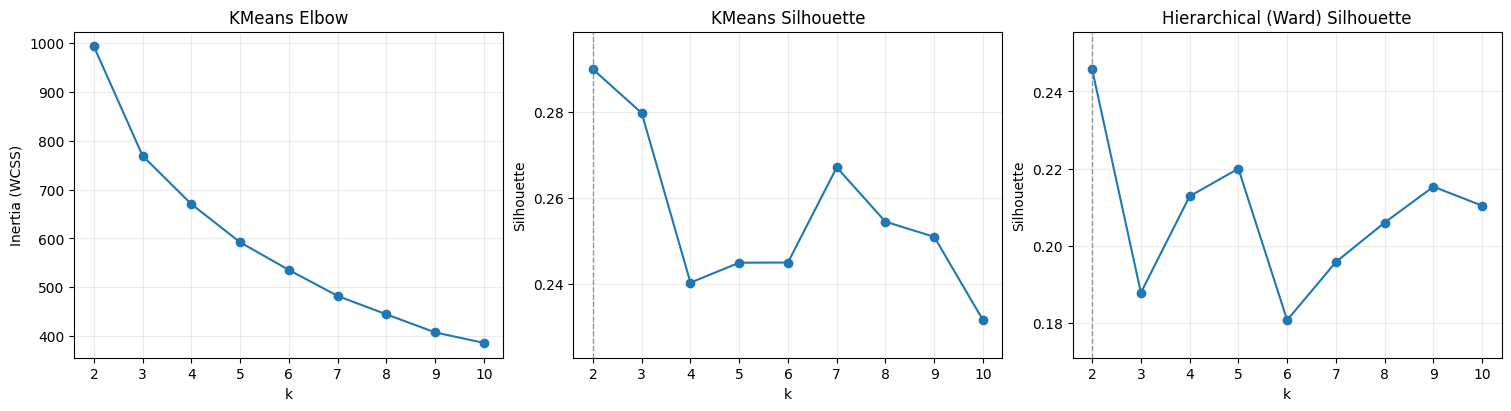

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def tight_ylim(vals, pad_frac=0.15, min_span=0.04):
    vmin, vmax = float(np.min(vals)), float(np.max(vals))
    span = max(vmax - vmin, min_span)   # ensure some span even if nearly flat
    pad  = pad_frac * span
    lo, hi = vmin - pad, vmax + pad
    # keep within valid silhouette range
    return max(0.0, lo), min(1.0, hi)

k_best_km  = ks[int(np.argmax(sil_kmeans))]
k_best_wrd = ks[int(np.argmax(sil_h))]

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

# 1) K-Means Elbow
axes[0].plot(ks, inertia, marker="o")
axes[0].set_title("KMeans Elbow")
axes[0].set_xlabel("k"); axes[0].set_ylabel("Inertia (WCSS)")
axes[0].grid(True, alpha=0.25)

# 2) K-Means Silhouette (tight y-scale)
axes[1].plot(ks, sil_kmeans, marker="o")
axes[1].axvline(k_best_km, ls="--", lw=1, color="gray", alpha=0.8)
axes[1].set_title("KMeans Silhouette")
axes[1].set_xlabel("k"); axes[1].set_ylabel("Silhouette")
axes[1].set_ylim(*tight_ylim(sil_kmeans))
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].grid(True, alpha=0.25)

# 3) Hierarchical (Ward) Silhouette (tight y-scale)
axes[2].plot(ks, sil_h, marker="o")
axes[2].axvline(k_best_wrd, ls="--", lw=1, color="gray", alpha=0.8)
axes[2].set_title("Hierarchical (Ward) Silhouette")
axes[2].set_xlabel("k"); axes[2].set_ylabel("Silhouette")
axes[2].set_ylim(*tight_ylim(sil_h))
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].grid(True, alpha=0.25)

plt.show()


In [78]:
# ==== 3) Hierarchical (Ward): choose k ====
best_k_h = ks[int(np.argmax(sil_h))]
ac_final = AgglomerativeClustering(n_clusters=best_k_h, linkage="ward")
hclust_labels = ac_final.fit_predict(X_std)

best_k_h, max(sil_h)


(2, np.float64(0.24574950716044353))

In [79]:
def _knee_from_kdist(kdist):
    """Return (idx, eps_at_knee, knee_quantile)."""
    n = len(kdist); x = np.arange(n)
    p1, p2 = np.array([0, kdist[0]]), np.array([n-1, kdist[-1]])
    v = p2 - p1; v = v / (np.linalg.norm(v) + 1e-12)
    diffs = np.vstack([x, kdist]).T - p1
    proj = diffs - (diffs @ v)[:, None] * v
    d = np.linalg.norm(proj, axis=1)
    idx = int(np.argmax(d))
    return idx, float(kdist[idx]), idx / max(1, (n - 1))

def best_dbscan(
    X,
    min_samples=5,
    q_low=0.30, q_high=0.995, n_q=60,           # wider, denser eps grid
    metric="euclidean",
    min_samples_grid=None,                      # try several min_samples
    max_noise=0.60                              # avoid solutions with huge noise
):
    """
    Sweep eps (from k-distance quantiles + knee) and multiple min_samples.
    Prefer >=2 clusters with finite silhouette; fallback = maximize clusters, then minimize noise.

    Returns: (res_df, best_labels, best_row, kdist_for_best_ms)
    """
    if min_samples_grid is None:
        # include the provided min_samples and a few nearby options
        min_samples_grid = sorted(set([max(3, min_samples-2), max(3, min_samples-1),
                                       min_samples, min_samples+1, min_samples+3, 8, 10]))

    all_rows, all_labels, kdist_map = [], [], {}

    for ms in min_samples_grid:
        nn = NearestNeighbors(n_neighbors=ms, metric=metric).fit(X)
        dists = nn.kneighbors(X)[0]                 # (n_samples, ms), first col is self=0
        kdist = np.sort(dists[:, -1])               # distance to ms-th neighbor
        kdist_map[ms] = kdist

        # quantile-based eps grid + knee eps, deduplicated
        qs = np.linspace(q_low, q_high, n_q)
        eps_grid = list(np.quantile(kdist, qs))
        _, eps_knee, _ = _knee_from_kdist(kdist)
        eps_grid += [eps_knee * 0.9, eps_knee, eps_knee * 1.1]   # small band around knee
        eps_grid = np.unique(np.asarray(eps_grid, dtype=float))

        for eps in eps_grid:
            labels = DBSCAN(eps=float(eps), min_samples=ms, metric=metric).fit_predict(X)
            n_cl = len(set(labels)) - (1 if -1 in labels else 0)
            noise = float((labels == -1).mean())

            sil = np.nan
            if n_cl >= 2 and noise <= max_noise:
                m = labels != -1
                if np.any(m) and len(np.unique(labels[m])) >= 2:
                    sil = silhouette_score(X[m], labels[m])

            all_rows.append([metric, ms, float(eps), n_cl, noise, sil])
            all_labels.append(labels)

    res = pd.DataFrame(all_rows, columns=["metric","min_samples","eps","n_clusters","noise_frac","silhouette"])

    target_k = 2

    # 1) Best with exactly 2 clusters
    cand2 = res[
        (res.n_clusters == target_k) &
        (res.noise_frac <= max_noise) &
        res.silhouette.notna()
    ]
    if len(cand2):
        i_best = cand2.silhouette.idxmax()
    else:
        # 2) Otherwise, pick closest to 2 clusters, best silhouette
        cand_any = res[
            (res.n_clusters >= 1) &  # allow 1..N clusters
            (res.noise_frac <= max_noise) &
            res.silhouette.notna()
        ].copy()
        if len(cand_any):
            cand_any["kdiff"] = (cand_any.n_clusters - target_k).abs()
            i_best = cand_any.sort_values(
                ["kdiff", "silhouette", "noise_frac", "eps"],
                ascending=[True, False, True, True]
            ).index[0]
        else:
            # 3) Last resort: closest k to 2, then lowest noise, then smaller eps
            tmp = res.copy()
            tmp["kdiff"] = (tmp.n_clusters - target_k).abs()
            i_best = tmp.sort_values(
                ["kdiff", "noise_frac", "eps"],
                ascending=[True, True, True]
            ).index[0]



    

    best_row   = res.loc[i_best]
    best_labels= all_labels[i_best]
    best_ms    = int(best_row["min_samples"])
    return res, best_labels, best_row, kdist_map[best_ms]

def _score(row):
    return -1.0 if pd.isna(row["silhouette"]) else float(row["silhouette"])

In [80]:
# standardized space
min_samples = max(5, int(0.02 * X_std.shape[0]))
res_db, db_labels, chosen_db, kdist = best_dbscan(
    X_std, min_samples=min_samples, metric="euclidean"
)

# PCA(90%) space
from sklearn.decomposition import PCA
pca90 = PCA(n_components=0.90, random_state=42)
X_pca = pca90.fit_transform(X_std)
res_db_pca, db_labels_pca, chosen_db_pca, kdist_pca = best_dbscan(
    X_pca, min_samples=min_samples, metric="euclidean"
)

# pick the better solution
use_pca = _score(chosen_db_pca) > _score(chosen_db)
db_labels_final = db_labels_pca if use_pca else db_labels
chosen_final    = chosen_db_pca if use_pca else chosen_db
chosen_space    = "PCA(90%)" if use_pca else "standardized"
print(chosen_space, chosen_final.to_dict())


PCA(90%) {'metric': 'euclidean', 'min_samples': 4, 'eps': 1.1783016915018, 'n_clusters': 2, 'noise_frac': 0.30538922155688625, 'silhouette': 0.40108605692862764}


Using PCA(90%): eps=1.1783, min_samples=4, clusters=2, noise=30.5%, silhouette=0.40108605692862764


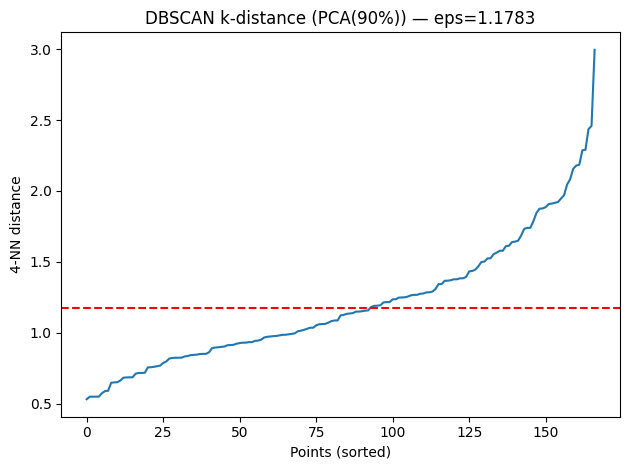

In [81]:
# chosen_final is the "best row" Series returned above
eps_best = float(chosen_final["eps"])
ms_best  = int(chosen_final["min_samples"])

# Pick the k-distances that correspond to the chosen space
# (best_dbscan already returned the k-distance curve for the BEST min_samples
# for that call, so these match ms_best in each space)
kd = kdist_pca if use_pca else kdist

print(
    f"Using {chosen_space}: eps={eps_best:.4f}, min_samples={ms_best}, "
    f"clusters={int(chosen_final['n_clusters'])}, "
    f"noise={chosen_final['noise_frac']:.1%}, "
    f"silhouette={chosen_final['silhouette']}"
)

# Plot the k-distance curve with the chosen eps
import matplotlib.pyplot as plt

plt.figure()
plt.plot(kd)
plt.axhline(eps_best, ls="--", color="r")
plt.ylabel(f"{ms_best}-NN distance")
plt.xlabel("Points (sorted)")
plt.title(f"DBSCAN k-distance ({chosen_space}) — eps={eps_best:.4f}")
plt.tight_layout()
plt.show()

In [82]:
# ==== 5) Add labels to df + profiles ====
df = df.copy()
df["cl_kmeans"] = kmeans_labels
df["cl_hier"]   = hclust_labels
df["cl_dbscan"] = db_labels_final   # -1 = noise

def profile(col):
    return df.groupby(col)[num_cols].mean().round(2).sort_index()

print(f"KMeans: best k={best_k}, silhouette={max(sil_kmeans):.3f}")
print(f"Hierarchical (Ward): best k={best_k_h}, silhouette={max(sil_h):.3f}")
print(f"DBSCAN ({chosen_space}): eps={chosen_final['eps']:.3f}, "
      f"min_samples={int(chosen_final['min_samples'])}, "
      f"clusters={int(chosen_final['n_clusters'])}, "
      f"noise={chosen_final['noise_frac']:.1%}, "
      f"silhouette={chosen_final['silhouette']}")

print("\nKMeans cluster profile (means):\n", profile("cl_kmeans"))
print("\nHierarchical cluster profile (means):\n", profile("cl_hier"))
print("\nDBSCAN cluster profile (means, excluding noise):\n",
      profile("cl_dbscan").drop(index=-1, errors="ignore"))


KMeans: best k=2, silhouette=0.290
Hierarchical (Ward): best k=2, silhouette=0.246
DBSCAN (PCA(90%)): eps=1.178, min_samples=4, clusters=2, noise=30.5%, silhouette=0.40108605692862764

KMeans cluster profile (means):
            child_mort  exports  health  imports    income  inflation  \
cl_kmeans                                                              
0               11.46    46.25    7.43    47.54  24639.47       4.84   
1               71.48    30.90    5.97    43.70   4695.79       9.94   

           life_expec  total_fer      gdpp  
cl_kmeans                                   
0               76.77       1.91  16720.96  
1               62.80       4.28   2149.23  

Hierarchical cluster profile (means):
          child_mort  exports  health  imports    income  inflation  \
cl_hier                                                              
0             57.00    28.89    6.33    39.95   7105.66       9.75   
1             11.61    53.95    7.41    53.85  27841.69       3

Cluster mean 'need' scores: {0: 4.273, 1: -3.319} => mapping: {np.int64(0): 'Actual Need', np.int64(1): 'Stable Prosperity', -1: 'Noise'}
Shared label count = 20


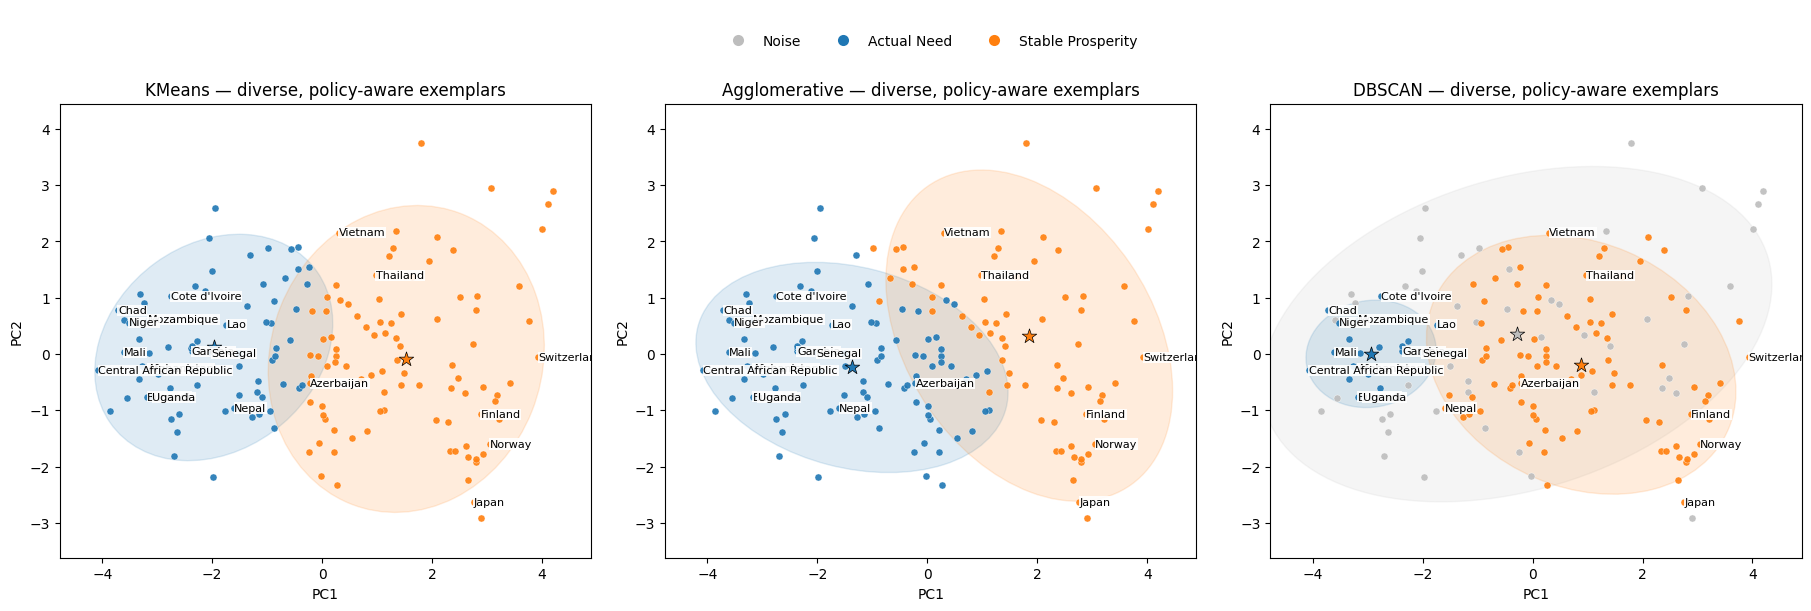

In [83]:
# ==========================================================
# CONFIG — labels per cluster & which panel decides the set
# ==========================================================
N_NEED = 12           # from "Actual Need"
N_PROS = 8            # from "Stable Prosperity"
SEED_POLICY_EACH = 2  # policy-aware seeds per cluster (rest chosen for spread)
MIN_PER_CLUSTER = 5   # guaranteed minimum for the picker algo
USE_ADJUSTTEXT = False
LABEL_SOURCE = "dbscan"   # "kmeans" | "agglomerative" | "dbscan" | "union" | "intersection"


# ------------------ Inputs expected ------------------
assert "df" in globals(), "df not found."
assert "country" in df.columns, "df must have a 'country' column."
assert "X_std" in globals(), "X_std (standardized features) is required."

# PCA(2) view if not already present
if "X2" not in globals():
    X2 = PCA(n_components=2, random_state=42).fit_transform(X_std)

COUNTRIES = df["country"].to_numpy()

# ==========================================================
# Helpers
# ==========================================================
def make_palette(labels, cmap_name="tab10"):
    uniq = [u for u in sorted(set(labels)) if u != -1]
    cmap = plt.get_cmap(cmap_name, max(10, len(uniq)))
    pal = {u: cmap(i % cmap.N) for i, u in enumerate(uniq)}
    pal[-1] = "#BDBDBD"  # for DBSCAN noise
    return pal

FEATURES_FOR_SCORING = ["child_mort","total_fer","income","gdpp","life_expec","inflation"]
def _need_and_prosperity_scores(df):
    M = df[FEATURES_FOR_SCORING].to_numpy(float)
    Z = (M - M.mean(0)) / (M.std(0, ddof=0) + 1e-12)
    idx = {c:i for i,c in enumerate(FEATURES_FOR_SCORING)}
    need = ( + Z[:,idx["child_mort"]] + Z[:,idx["total_fer"]]
             - Z[:,idx["income"]]    - Z[:,idx["gdpp"]]
             - Z[:,idx["life_expec"]] + 0.3*Z[:,idx["inflation"]] )
    return need, -need

def _extremes_on_axes(P2):
    if len(P2)==0: return np.array([], int)
    S = {int(np.argmin(P2[:,0])), int(np.argmax(P2[:,0])),
         int(np.argmin(P2[:,1])), int(np.argmax(P2[:,1]))}
    return np.array(sorted(S), int)

def _kmeans_reps(P2, m, exclude=set(), seed=42):
    if m<=0 or len(P2)==0: return np.array([], int)
    m = min(m, len(P2))
    km = KMeans(n_clusters=m, n_init=20, random_state=seed).fit(P2)
    chosen=[]
    for c in km.cluster_centers_:
        d = np.linalg.norm(P2-c, axis=1)
        for j in np.argsort(d):
            if j not in exclude:
                chosen.append(int(j)); break
    return np.array(chosen, int)

def pick_labels_spread(df, X2, labels, name_map,
                       n_need=12, n_pros=8, seed_each=2, seed=42):
    """Pick a spread set *within this labeling* (global row indices)."""
    labels = np.asarray(labels)
    need_id = next(k for k,v in name_map.items() if v=="Actual Need")
    pros_id = next(k for k,v in name_map.items() if v=="Stable Prosperity")
    need, pros = _need_and_prosperity_scores(df)

    out=[]
    for cid, target, score in [(need_id, n_need, need),
                               (pros_id, n_pros, pros)]:
        idx_all = np.where(labels==cid)[0]
        if len(idx_all)==0 or target==0: continue
        P = X2[idx_all]
        want = min(target, len(idx_all))

        seeds = np.argsort(score[idx_all])[::-1][:min(seed_each, want)]
        chosen = set(int(x) for x in seeds)

        for j in _extremes_on_axes(P):
            if len(chosen) < want: chosen.add(int(j))

        remain = want - len(chosen)
        if remain>0:
            reps = _kmeans_reps(P, remain, exclude=chosen, seed=seed)
            chosen.update(int(x) for x in reps)

        out.extend(idx_all[sorted(chosen)])
    return np.array(sorted(set(out)), int)

def enforce_min_per_cluster(idx_sel, labels, X2, min_per_cluster=5, include_noise=False):
    labels = np.asarray(labels)
    chosen = set(np.asarray(idx_sel, int))
    for c in np.unique(labels):
        if (c==-1) and (not include_noise): 
            continue
        pool = np.where(labels==c)[0]
        have = sum(1 for i in chosen if labels[i]==c)
        need = max(0, min_per_cluster-have)
        if need>0 and len(pool)>0:
            P = X2[pool]; ctr=P.mean(0); d=np.linalg.norm(P-ctr, axis=1)
            chosen.update(pool[np.argsort(-d)[:need]])
    return np.array(sorted(chosen), int)

def _ellipse(ax, P, color, alpha=0.12, k=2.0):
    if len(P)<3: return
    mu=P.mean(0); cov=np.cov(P.T)
    vals, vecs = np.linalg.eigh(cov)
    o=vals.argsort()[::-1]; vals, vecs = vals[o], vecs[:,o]
    ang=np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w,h = 2*k*np.sqrt(vals)
    e=Ellipse(mu, w, h, angle=ang, facecolor=color, edgecolor=color, lw=1, alpha=alpha, zorder=1)
    ax.add_patch(e)
    ax.scatter(*mu, s=120, marker="*", color=color, ec="black", lw=0.5, zorder=3)

def draw_panel(ax, X2, labels, countries, palette, name_map, idx_label, title):
    ax.set_facecolor("white"); ax.grid(False)
    for c in sorted(set(labels)):
        m = (labels==c)
        col = palette[int(c)]
        ax.scatter(X2[m,0], X2[m,1], s=26, c=[col], alpha=0.9,
                   edgecolor="white", linewidth=0.3, zorder=2)
        _ellipse(ax, X2[m], col, alpha=0.14, k=2.0)

    # SAME labels used for all panels:
    texts=[]
    for i in np.unique(idx_label):
        t=ax.text(X2[i,0], X2[i,1], str(countries[i]),
                  fontsize=8, ha="left", va="center",
                  bbox=dict(fc="white", ec="none", alpha=0.9, pad=0.4),
                  zorder=4, clip_on=True)
        texts.append(t)

    if USE_ADJUSTTEXT and len(texts):
        try:
            from adjustText import adjust_text
            adjust_text(texts,
                        only_move={"points":"y","text":"y"},
                        expand_points=(1.02,1.02),
                        expand_text=(1.02,1.02),
                        force_text=0.35, force_points=0.18,
                        arrowprops=None)
        except Exception:
            pass

    ax.set_title(title, fontsize=12); ax.set_xlabel("PC1"); ax.set_ylabel("PC2")

# ---- Label-building helpers ----
def orient_along_pc1(labels, X2):
    labs = np.asarray(labels); uniq = np.unique(labs)
    means = {c: X2[labs == c, 0].mean() for c in uniq}
    ordered = [c for c, _ in sorted(means.items(), key=lambda kv: kv[1])]
    remap = {old: new for new, old in enumerate(ordered)}
    out = np.array([remap[x] for x in labs], dtype=int)
    return out, remap

def align_to_ref(pred, ref):
    pred = np.asarray(pred); ref = np.asarray(ref)
    tab = pd.crosstab(pred, ref)
    rows, cols = tab.index.to_numpy(), tab.columns.to_numpy()
    cost = (tab.max() - tab).to_numpy()
    r, c = linear_sum_assignment(cost)
    mapping = {rows[i]: cols[j] for i, j in zip(r, c)}
    return np.array([mapping.get(x, x) for x in pred]), mapping

def collapse_dbscan_to_k(db_labels, X_std, ref_centers):
    labs = np.asarray(db_labels)
    out = np.full(labs.shape, -1, dtype=int)
    for cl in np.unique(labs):
        if cl == -1: continue
        idx = np.where(labs == cl)[0]
        center = X_std[idx].mean(axis=0)
        assign = int(np.argmin(np.linalg.norm(ref_centers - center, axis=1)))
        out[idx] = assign
    return out

def infer_name_map_from_scores(labels, df):
    """Infer which numeric id is 'Actual Need' vs 'Stable Prosperity' using need score."""
    need, _ = _need_and_prosperity_scores(df)
    labs = [c for c in np.unique(labels) if c != -1]
    if len(labs) != 2:
        # choose two most common non-noise labels if more exist
        vals, cnt = np.unique(labels[labels!=-1], return_counts=True)
        labs = list(vals[np.argsort(cnt)[-2:]])
    m = {c: float(np.mean(need[labels==c])) for c in labs}
    # higher mean need => "Actual Need"
    need_id = max(m, key=m.get)
    pros_id = [c for c in labs if c != need_id][0]
    NAME_MAP = {need_id: "Actual Need", pros_id: "Stable Prosperity", -1: "Noise"}
    print("Cluster mean 'need' scores:", {int(k): round(v,3) for k,v in m.items()},
          f"=> mapping: {NAME_MAP}")
    return NAME_MAP

# ==========================================================
# Build/prepare labels in df if missing
# ==========================================================
cols = set(df.columns)

# --- KMEANS ---
if "cl_kmeans2" in cols:
    labels_km = df["cl_kmeans2"].to_numpy()
else:
    if "kmeans_labels" in globals():
        km_raw = np.asarray(kmeans_labels)
    elif "cl_kmeans" in cols:
        km_raw = df["cl_kmeans"].to_numpy()
    else:
        raise AssertionError("Need 'cl_kmeans2' or a raw KMeans label array/column.")
    labels_km, _ = orient_along_pc1(km_raw, X2)
    df["cl_kmeans2"] = labels_km

# --- HIERARCHICAL ---
if "cl_hier2" in cols:
    labels_hier = df["cl_hier2"].to_numpy()
else:
    if "hclust_labels" in globals():
        hier_raw = np.asarray(hclust_labels)
    elif "cl_hier" in cols:
        hier_raw = df["cl_hier"].to_numpy()
    else:
        hier_raw = None
    if hier_raw is None:
        labels_hier = labels_km.copy()
    else:
        labels_hier, _ = align_to_ref(hier_raw, labels_km)
    df["cl_hier2"] = labels_hier

# --- DBSCAN (optional) ---
if "cl_dbscan2" in cols:
    labels_db = df["cl_dbscan2"].to_numpy()
else:
    if "db_labels_final" in globals():
        db_raw = np.asarray(db_labels_final)
    elif "cl_dbscan" in cols:
        db_raw = df["cl_dbscan"].to_numpy()
    else:
        db_raw = None
    if db_raw is not None:
        km_centers_ref = np.vstack([X_std[labels_km==c].mean(axis=0)
                                    for c in np.unique(labels_km)])
        labels_db = collapse_dbscan_to_k(db_raw, X_std, km_centers_ref)
        df["cl_dbscan2"] = labels_db
    else:
        labels_db = None

# ==========================================================
# Infer the correct NAME_MAP from KMeans labels (reference)
# ==========================================================
NAME_MAP = infer_name_map_from_scores(labels_km, df)

# ==========================================================
# Build selections separately, then CHOOSE ONE set to reuse
# ==========================================================
show_db = labels_db is not None

pal_all = make_palette(labels_km)      # for kmeans/agglomerative
pal_db  = dict(pal_all); pal_db[-1] = pal_db.get(-1, "#BDBDBD")

idx_km   = pick_labels_spread(df, X2, labels_km,   NAME_MAP, N_NEED, N_PROS, SEED_POLICY_EACH)
idx_km   = enforce_min_per_cluster(idx_km,   labels_km,   X2, MIN_PER_CLUSTER)

idx_hier = pick_labels_spread(df, X2, labels_hier, NAME_MAP, N_NEED, N_PROS, SEED_POLICY_EACH)
idx_hier = enforce_min_per_cluster(idx_hier, labels_hier, X2, MIN_PER_CLUSTER)

if show_db:
    idx_db = pick_labels_spread(df, X2, labels_db, NAME_MAP, N_NEED, N_PROS, SEED_POLICY_EACH)
else:
    idx_db = None

# decide the ONE set to reuse everywhere
if LABEL_SOURCE == "kmeans":
    idx_master = idx_km
elif LABEL_SOURCE in ("agglomerative", "agglo"):
    idx_master = idx_hier
elif LABEL_SOURCE == "dbscan" and show_db:
    idx_master = idx_db
elif LABEL_SOURCE == "union":
    parts = [idx_km, idx_hier] + ([idx_db] if show_db else [])
    idx_master = np.unique(np.concatenate(parts))
elif LABEL_SOURCE == "intersection" and show_db:
    tmp = np.intersect1d(idx_km, idx_hier)
    idx_master = np.intersect1d(tmp, idx_db)
    if len(idx_master) == 0:
        idx_master = idx_km
else:
    idx_master = idx_km

print(f"Shared label count = {len(idx_master)}")

# ==========================================================
# Plot side-by-side with the SAME labels in each panel
# ==========================================================
import matplotlib.gridspec as gridspec
ncols = 3 if show_db else 2
fig = plt.figure(figsize=(18, 6), constrained_layout=True)
gs  = gridspec.GridSpec(nrows=2, ncols=ncols, height_ratios=[0.14, 1.0], figure=fig)

ax_leg = fig.add_subplot(gs[0, :]); ax_leg.axis("off")
axes = [fig.add_subplot(gs[1, i]) for i in range(ncols)]

pad = 0.7
x_min, x_max = X2[:,0].min()-pad, X2[:,0].max()+pad
y_min, y_max = X2[:,1].min()-pad, X2[:,1].max()+pad

draw_panel(axes[0], X2, labels_km,   COUNTRIES, pal_all, NAME_MAP, idx_master,
           "KMeans — diverse, policy-aware exemplars")
axes[0].set_xlim(x_min, x_max); axes[0].set_ylim(y_min, y_max)

draw_panel(axes[1], X2, labels_hier, COUNTRIES, pal_all, NAME_MAP, idx_master,
           "Agglomerative — diverse, policy-aware exemplars")
axes[1].set_xlim(x_min, x_max); axes[1].set_ylim(y_min, y_max)

labels_union = [labels_km, labels_hier]
if show_db:
    draw_panel(axes[2], X2, labels_db, COUNTRIES, pal_db, NAME_MAP, idx_master,
               "DBSCAN — diverse, policy-aware exemplars")
    axes[2].set_xlim(x_min, x_max); axes[2].set_ylim(y_min, y_max)
    labels_union.append(labels_db)

# shared legend
labs_all = sorted(set(np.concatenate([np.unique(l) for l in labels_union])))
handles = [Line2D([0],[0], marker='o', color='w',
                  label=NAME_MAP.get(int(c), f"Cluster {c}"),
                  markerfacecolor=(pal_db if c==-1 else pal_all).get(int(c), "#999"),
                  markeredgecolor="none", markersize=8)
           for c in labs_all]
ax_leg.legend(handles=handles, loc="center", ncols=min(3, len(handles)), frameon=False)

plt.show()


In [84]:
# ==== 7) Helper functions for export (match your app.py expectations) ====
from typing import Dict

def compute_centroids(X_space: np.ndarray, labels: np.ndarray) -> Dict[int, np.ndarray]:
    uniq = sorted([c for c in set(labels) if c != -1])
    return {int(c): X_space[labels == c].mean(axis=0) for c in uniq}

def compute_radii(X_space: np.ndarray, labels: np.ndarray, centroids: Dict[int, np.ndarray], q=0.95):
    radii = {}
    for c, mu in centroids.items():
        pts = X_space[labels == c]
        d = np.linalg.norm(pts - mu, axis=1)
        radii[c] = float(np.quantile(d, q))
    return radii


In [85]:
#=================================

In [86]:
# ==== 8B) Export ALL THREE models ====
def _pack_save(name, preproc, model, labels, model_meta, is_dbscan, X_space):
    cents = compute_centroids(X_space, labels)
    rad = compute_radii(X_space, labels, cents) if is_dbscan else None
    artifact = {"preproc": preproc, "model": model, "centroids": cents, "radii": rad, "labels_train": labels}
    meta = {"model_type": name, "feature_names": num_cols[:], "model_meta": model_meta}
    joblib.dump(artifact, os.path.join(MODEL_DIR, f"pipeline_{name}.joblib"))
    with open(os.path.join(MODEL_DIR, f"meta_{name}.json"), "w") as f:
        json.dump(meta, f, indent=2)
    print(f"WROTE: pipeline_{name}.joblib / meta_{name}.json")

# KMEANS
pre_k = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]).fit(df[num_cols])
Xk = pre_k.transform(df[num_cols])
_pack_save("kmeans", pre_k, km_final, kmeans_labels,
           {"best_k": int(best_k), "silhouette": float(max(sil_kmeans))},
           is_dbscan=False, X_space=Xk)

# HIER
pre_h = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]).fit(df[num_cols])
Xh = pre_h.transform(df[num_cols])
_pack_save("hier", pre_h, ac_final, hclust_labels,
           {"best_k": int(best_k_h), "silhouette": float(max(sil_h))},
           is_dbscan=False, X_space=Xh)

# DBSCAN (mirror chosen space)
if use_pca:
    pre_d = Pipeline([("imputer", SimpleImputer(strategy="median")),
                      ("scaler", StandardScaler()),
                      ("pca", PCA(n_components=0.90, random_state=42))]).fit(df[num_cols])
else:
    pre_d = Pipeline([("imputer", SimpleImputer(strategy="median")),
                      ("scaler", StandardScaler())]).fit(df[num_cols])
Xd = pre_d.transform(df[num_cols])
db = DBSCAN(eps=float(chosen_final["eps"]),
            min_samples=int(chosen_final["min_samples"])).fit(Xd)
yd = db.labels_
ncl = int(len(set(yd)) - (1 if -1 in yd else 0))
noise = float((yd == -1).mean())
# silhouette on non-noise if >=2 clusters
sil = None
mask = (yd != -1)
if mask.sum() >= 2 and len(set(yd[mask])) >= 2:
    sil = float(silhouette_score(Xd[mask], yd[mask]))

_pack_save("dbscan", pre_d, db, yd,
           {"eps": float(chosen_final["eps"]),
            "min_samples": int(chosen_final["min_samples"]),
            "n_clusters": ncl,
            "noise_frac": noise,
            "silhouette": sil},
           is_dbscan=True, X_space=Xd)


WROTE: pipeline_kmeans.joblib / meta_kmeans.json
WROTE: pipeline_hier.joblib / meta_hier.json
WROTE: pipeline_dbscan.joblib / meta_dbscan.json


In [87]:
# pick which one to check: "kmeans", "hier", or "dbscan"
name = "kmeans"

ART = joblib.load(os.path.join(MODEL_DIR, f"pipeline_{name}.joblib"))
META = json.load(open(os.path.join(MODEL_DIR, f"meta_{name}.json"), "r"))

print("Loaded model_type:", META["model_type"])
print("First 5 features:", META["feature_names"][:5])

# Try a real row
row = df[META["feature_names"]].iloc[[0]]
Xrow = ART["preproc"].transform(row)

if META["model_type"] == "kmeans":
    pred = int(ART["model"].predict(Xrow)[0])
else:
    cents = {int(k): np.array(v) for k, v in ART["centroids"].items()}
    dists = {c: float(np.linalg.norm(Xrow[0] - mu)) for c, mu in cents.items()}
    label = min(dists, key=dists.get) if dists else 0
    if META["model_type"] == "dbscan" and ART["radii"] is not None:
        if dists[label] > ART["radii"][label]:
            label = -1
    pred = label

print(f"Test label from {name}:", pred)


Loaded model_type: kmeans
First 5 features: ['child_mort', 'exports', 'health', 'imports', 'income']
Test label from kmeans: 1


In [88]:
FEATURES = ['child_mort','life_expec','health','inflation','total_fer',
            'income','gdpp']  # adjust to your set

def cluster_cards(df, labels, name="cluster", k_examples=6):
    t = df.copy(); t[name] = labels
    g = t.groupby(name)
    med = g[FEATURES].median().round(2)
    n   = g.size().rename("n")
    ex  = g['country'].apply(lambda s: ", ".join(s.head(k_examples)))
    cards = med.copy(); cards.insert(0, "n", n); cards["examples"] = ex
    return cards.sort_index()

cards_km = cluster_cards(df, df['cl_kmeans'], name="km")
cards_ag = cluster_cards(df, df['cl_hier'],  name="agg")
display(cards_km)  # put this as "Cluster personas" table in the blog


,n,child_mort,life_expec,health,inflation,total_fer,income,gdpp,examples
km,,,,,,,,,
0,94,10.1,76.45,7.40,3.02,1.87,20250.0,12150.0,"Albania, Antigua and Barbuda, Argentina, Armen..."
1,73,63.7,62.90,5.25,8.78,4.37,2790.0,1220.0,"Afghanistan, Algeria, Angola, Bangladesh, Beni..."


KMeans (k=2)

km:0 (n=94) → higher development: very low child_mort (10.1), high life_expec (76.45), higher health spend (7.40%), low fertility (1.87), high income (≈20.3k) and gdpp (≈12.2k).

km:1 (n=73) → acute need: high child_mort (63.7), lower life_expec (62.9), lower health spend (5.25%), high fertility (4.37), low income (≈2.8k) and gdpp (≈1.2k), higher “inflation” (8.78).

In [89]:
cards_ag

,n,child_mort,life_expec,health,inflation,total_fer,income,gdpp,examples
agg,,,,,,,,,
0,96,52.45,67.35,5.64,8.09,3.32,5170.0,2625.0,"Afghanistan, Albania, Algeria, Angola, Argenti..."
1,71,7.00,77.10,7.46,2.01,1.87,28300.0,19800.0,"Antigua and Barbuda, Australia, Austria, Baham..."


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_feature_row(cards_df, features, cluster_colors,
                     cluster_order=None,
                     title="Cluster personas — medians (actual units)",
                     annotate=True, sharey=False, bar_width=0.55,
                     height=4,
                     legend_out=True,
                     legend_pos="top",        # "top" or "bottom"
                     legend_y=1.03,           # y of legend anchor when legend_pos="top"
                     title_y=1.12,            # y of suptitle (place it higher than legend)
                     legend_ncols=None):
    """
    One horizontal row of subplots: grouped bars per feature with clean spacing.
    """
    if cluster_order is None:
        cluster_order = list(cards_df.index)

    feats = [f for f in features if f in cards_df.columns]
    nF = len(feats)
    fig, axes = plt.subplots(1, nF,
                             figsize=(max(6, 2.6*nF), height),
                             sharey=sharey, constrained_layout=False)
    if nF == 1:
        axes = [axes]

    def _fmt(v): return f"{v:,.0f}" if abs(v) >= 1000 else f"{v:.2f}"

    # bars
    for ax, feat in zip(axes, feats):
        y = cards_df.loc[cluster_order, feat].values.astype(float)
        x = np.arange(len(cluster_order))
        colors = [cluster_colors[c] for c in cluster_order]

        bars = ax.bar(x, y, width=bar_width, color=colors,
                      edgecolor="black", linewidth=0.4)

        # headroom for labels
        y_max, y_min = float(y.max()), float(y.min())
        span = (y_max - y_min) if (y_max != y_min) else (abs(y_max) or 1.0)
        pad_top = 0.18 * span
        ax.set_ylim(y_min - 0.05*span, y_max + pad_top)

        ax.set_title(feat, fontsize=10, pad=6)
        xt = [f"{c}\n(n={int(cards_df.loc[c,'n'])})" if "n" in cards_df.columns else str(c)
              for c in cluster_order]
        ax.set_xticks(x)
        ax.set_xticklabels(xt, fontsize=9)
        ax.axhline(0, color="k", lw=0.5)

        if annotate:
            off = 0.02 * span
            for xi, yi in zip(x, y):
                ax.text(xi, yi + (off if yi >= 0 else -off),
                        _fmt(yi), ha="center",
                        va=("bottom" if yi >= 0 else "top"),
                        fontsize=8, clip_on=False)

    axes[0].set_ylabel("Median (original units)")

    # legend + title with generous spacing
    handles = [Patch(color=cluster_colors[c], label=f"Cluster {c}")
               for c in cluster_order]
    if legend_ncols is None:
        legend_ncols = min(len(cluster_order), 6)

    if legend_out and legend_pos == "top":
        fig.legend(handles=handles, loc="upper center",
                   bbox_to_anchor=(0.5, legend_y),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=title_y, fontsize=12)
        # leave room up to just below the legend
        fig.tight_layout(rect=[0, 0, 1, min(0.92, legend_y - 0.04)])
    elif legend_out and legend_pos == "bottom":
        fig.legend(handles=handles, loc="lower center",
                   bbox_to_anchor=(0.5, -0.06),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=0.99, fontsize=12)
        fig.tight_layout(rect=[0, 0.06, 1, 0.95])
    else:
        axes[-1].legend(handles=handles, frameon=False, loc="best")
        fig.suptitle(title, fontsize=12)
        fig.tight_layout()

    plt.show()


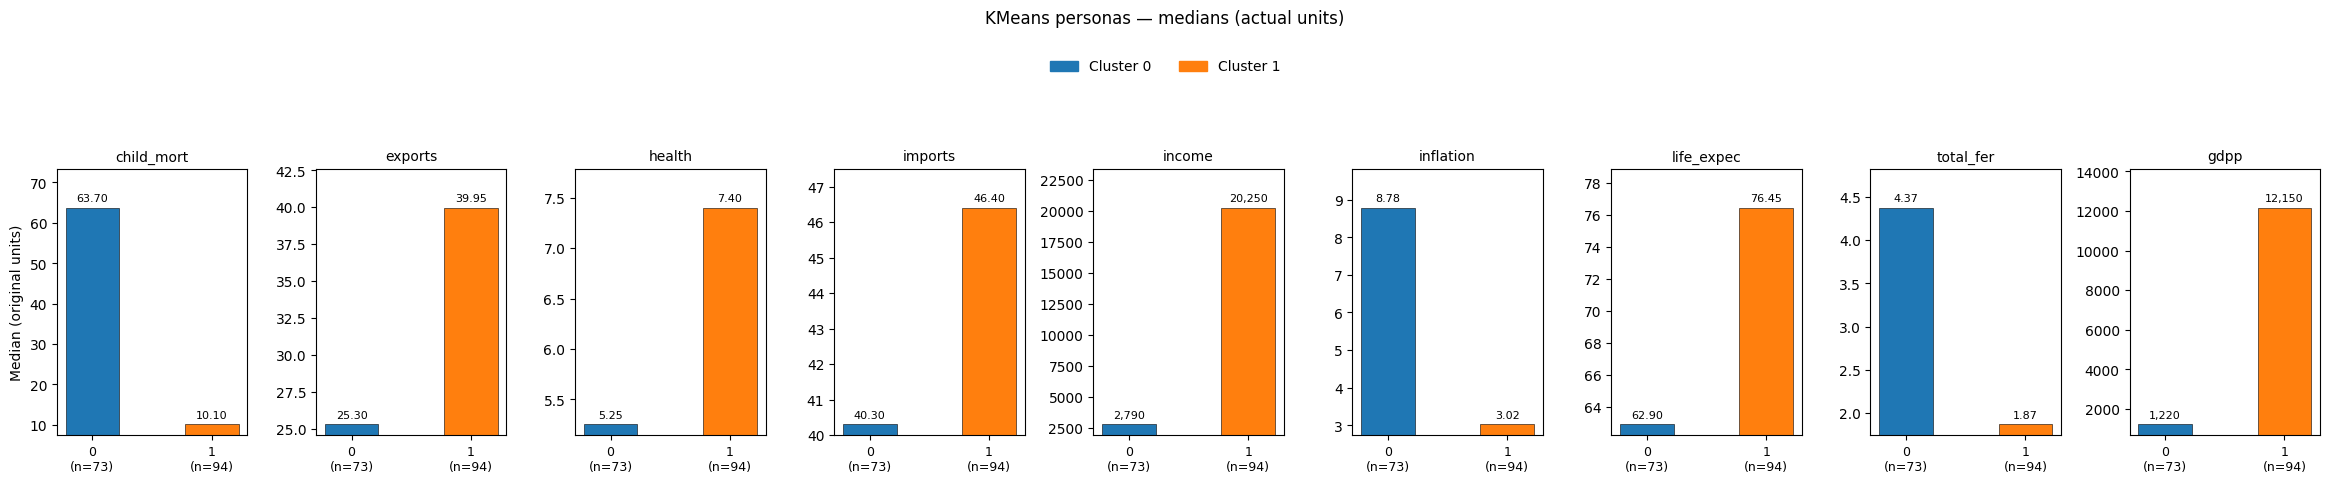

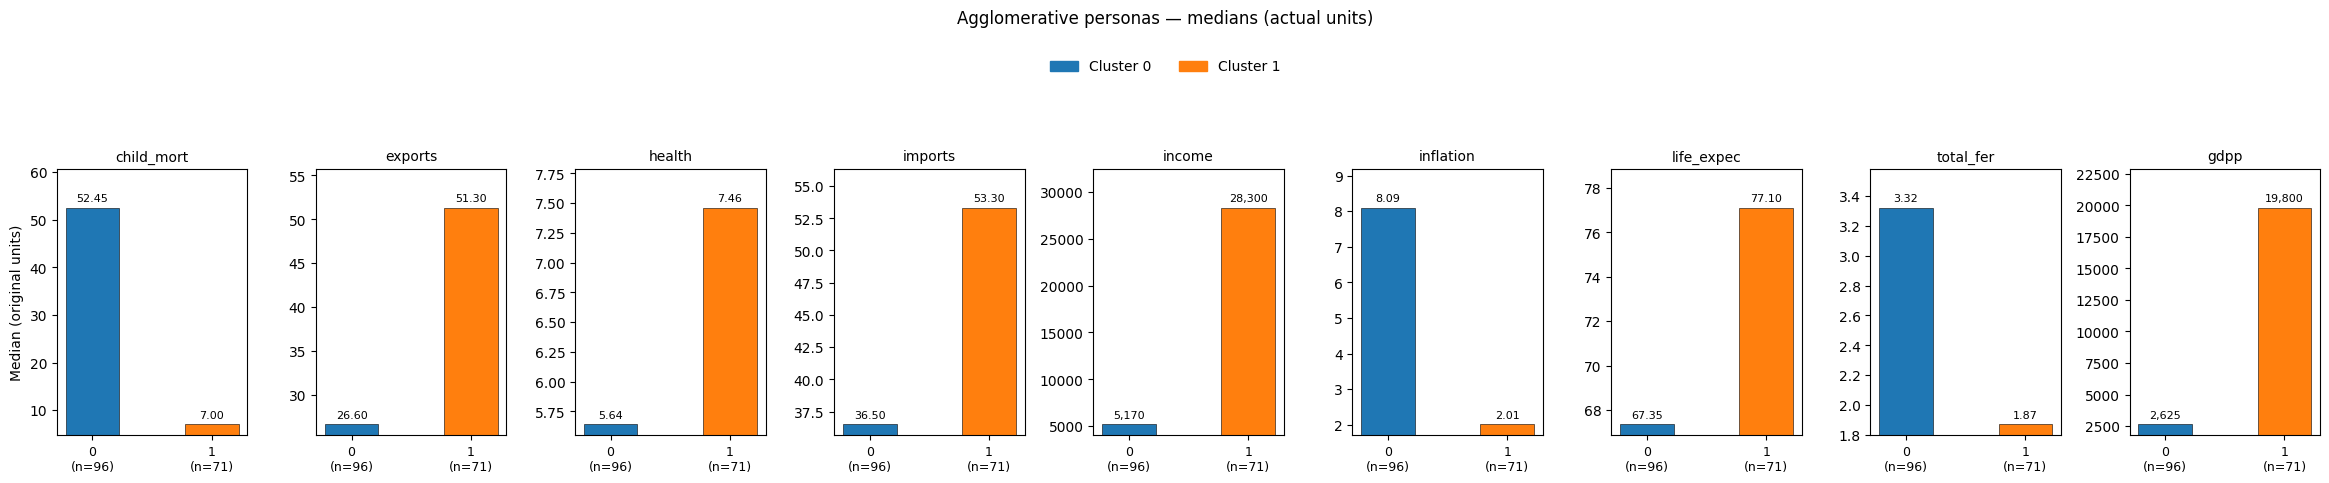

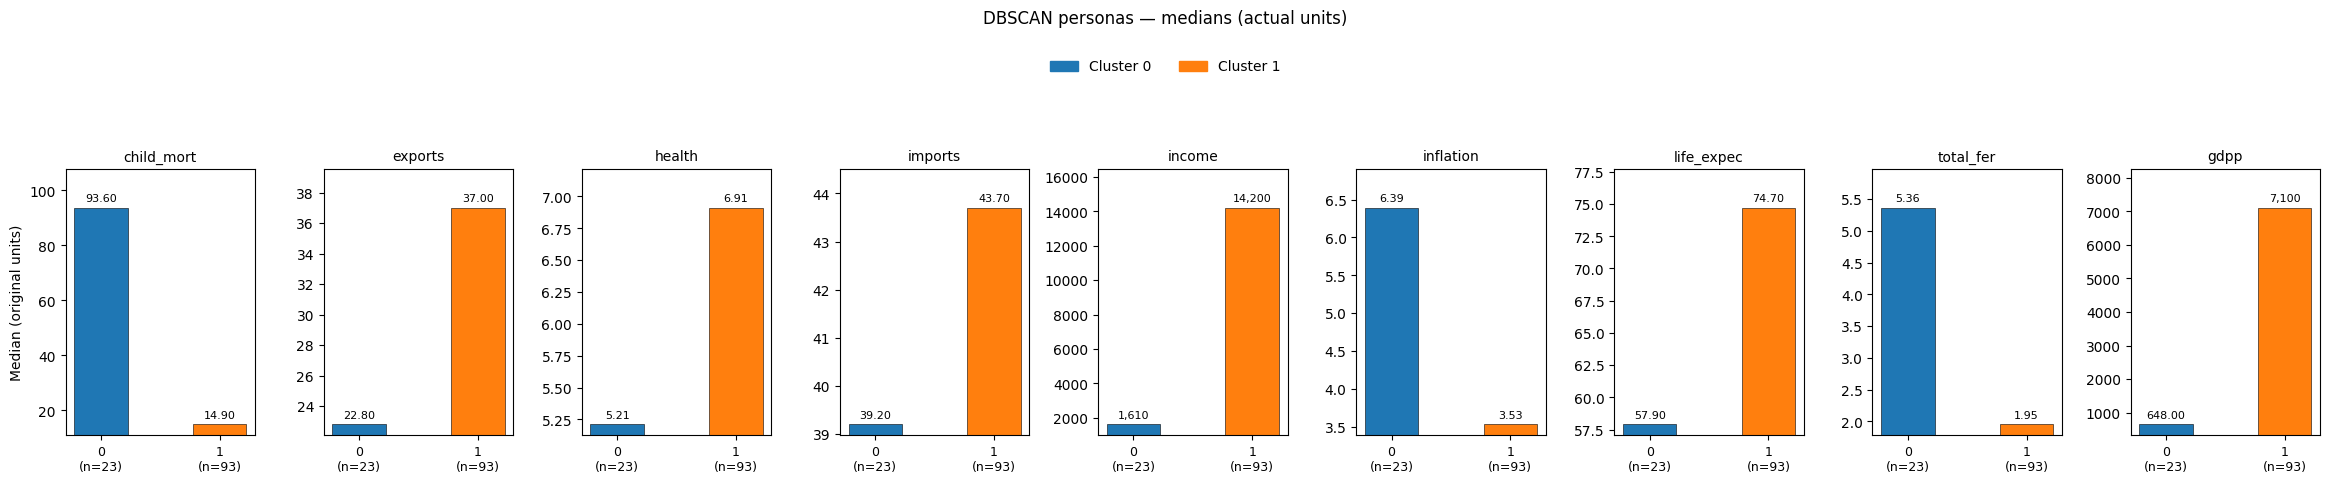

In [91]:
# ========= Cluster personas / cards (works after the side-by-side script) =========
FEATURES = df.columns[1:10].tolist()  # adjust to your set

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def cluster_cards(df, labels, name="cluster", k_examples=6):
    t = df.copy(); t[name] = labels
    g = t.groupby(name, dropna=False)
    med = g[FEATURES].median().round(2)
    n   = g.size().rename("n")
    ex  = g['country'].apply(lambda s: ", ".join(s.head(k_examples)))
    cards = med.copy(); cards.insert(0, "n", n); cards["examples"] = ex
    return cards.sort_index()

def plot_feature_row(cards_df, features, cluster_colors,
                     cluster_order=None,
                     title="Cluster personas — medians (actual units)",
                     annotate=True, sharey=False, bar_width=0.55,
                     height=4.2,
                     legend_out=True,
                     legend_pos="top",        # "top" or "bottom"
                     legend_y=1.05,           # y of legend anchor when legend_pos="top"
                     title_y=1.14,            # y of suptitle (place it higher than legend)
                     legend_ncols=None):
    if cluster_order is None:
        cluster_order = list(cards_df.index)

    feats = [f for f in features if f in cards_df.columns]
    nF = len(feats)
    fig, axes = plt.subplots(1, nF, figsize=(max(6, 2.6*nF), height),
                             sharey=sharey, constrained_layout=False)
    if nF == 1: axes = [axes]

    def _fmt(v): return f"{v:,.0f}" if abs(v) >= 1000 else f"{v:.2f}"

    for ax, feat in zip(axes, feats):
        y = cards_df.loc[cluster_order, feat].values.astype(float)
        x = np.arange(len(cluster_order))
        colors = [cluster_colors[c] for c in cluster_order]

        bars = ax.bar(x, y, width=bar_width, color=colors,
                      edgecolor="black", linewidth=0.4)

        y_max, y_min = float(y.max()), float(y.min())
        span = (y_max - y_min) if (y_max != y_min) else (abs(y_max) or 1.0)
        pad_top = 0.18 * span
        ax.set_ylim(y_min - 0.05*span, y_max + pad_top)

        ax.set_title(feat, fontsize=10, pad=6)
        xt = [f"{c}\n(n={int(cards_df.loc[c,'n'])})" if "n" in cards_df.columns else str(c)
              for c in cluster_order]
        ax.set_xticks(x)
        ax.set_xticklabels(xt, fontsize=9)
        ax.axhline(0, color="k", lw=0.5)

        if annotate:
            off = 0.02 * span
            for xi, yi in zip(x, y):
                ax.text(xi, yi + (off if yi >= 0 else -off),
                        _fmt(yi), ha="center",
                        va=("bottom" if yi >= 0 else "top"),
                        fontsize=8, clip_on=False)

    axes[0].set_ylabel("Median (original units)")

    handles = [Patch(color=cluster_colors[c], label=f"Cluster {c}") for c in cluster_order]
    if legend_ncols is None:
        legend_ncols = min(len(cluster_order), 6)

    if legend_out and legend_pos == "top":
        fig.legend(handles=handles, loc="upper center",
                   bbox_to_anchor=(0.5, legend_y),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=title_y, fontsize=12)
        fig.tight_layout(rect=[0, 0, 1, min(0.92, legend_y - 0.04)])
    elif legend_out and legend_pos == "bottom":
        fig.legend(handles=handles, loc="lower center",
                   bbox_to_anchor=(0.5, -0.06),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=0.99, fontsize=12)
        fig.tight_layout(rect=[0, 0.06, 1, 0.95])
    else:
        axes[-1].legend(handles=handles, frameon=False, loc="best")
        fig.suptitle(title, fontsize=12)
        fig.tight_layout()
    plt.show()

# 1) One reference palette from KMeans (same as your scatter/legend)
pal = make_palette(df["cl_kmeans2"].to_numpy())   # <- reuse everywhere

# 2) Build cards from the aligned/oriented columns already in df
cards_km = cluster_cards(df, df["cl_kmeans2"].to_numpy(), name="km")
cards_ag = cluster_cards(df, df["cl_hier2"].to_numpy(),  name="agg")

# DBSCAN: drop noise rows when making cards (if present)
if "cl_dbscan2" in df.columns:
    m = df["cl_dbscan2"] != -1
    cards_db = cluster_cards(df.loc[m], df.loc[m, "cl_dbscan2"].to_numpy(), name="db")
else:
    cards_db = None

# 3) Consistent cluster order across plots
order = sorted(cards_km.index)  # uses KM order as reference

# 4) Plot rows with the SAME palette
plot_feature_row(cards_km, FEATURES, pal,
                 cluster_order=order,
                 title="KMeans personas — medians (actual units)",
                 legend_out=True, legend_pos="top",
                 legend_y=1.05, title_y=1.14,
                 bar_width=0.45, height=4.2)

plot_feature_row(cards_ag, FEATURES, pal,
                 cluster_order=order,
                 title="Agglomerative personas — medians (actual units)",
                 legend_out=True, legend_pos="top",
                 legend_y=1.05, title_y=1.14,
                 bar_width=0.45, height=4.2)

if cards_db is not None and len(cards_db):
    plot_feature_row(cards_db, FEATURES, pal,
                     cluster_order=order,
                     title="DBSCAN personas — medians (actual units)",
                     legend_out=True, legend_pos="top",
                     legend_y=1.05, title_y=1.14,
                     bar_width=0.45, height=4.2)


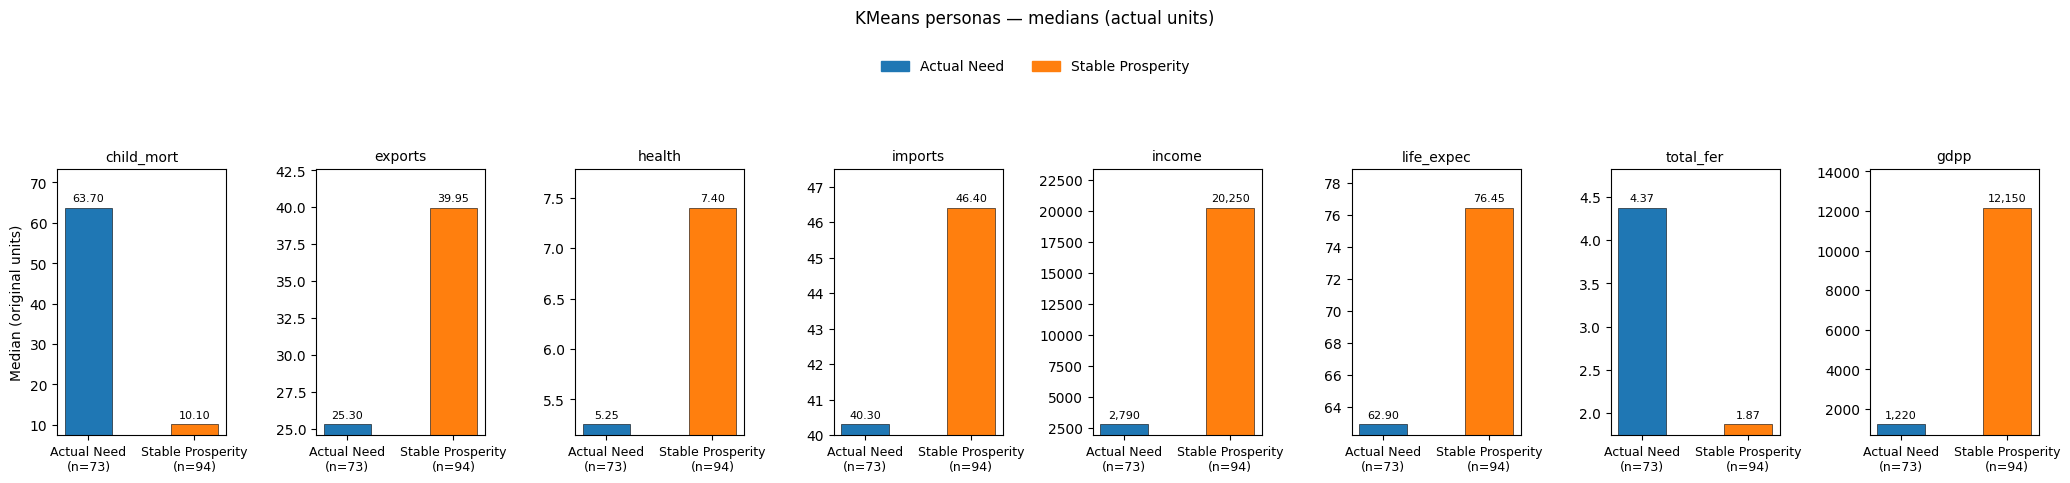

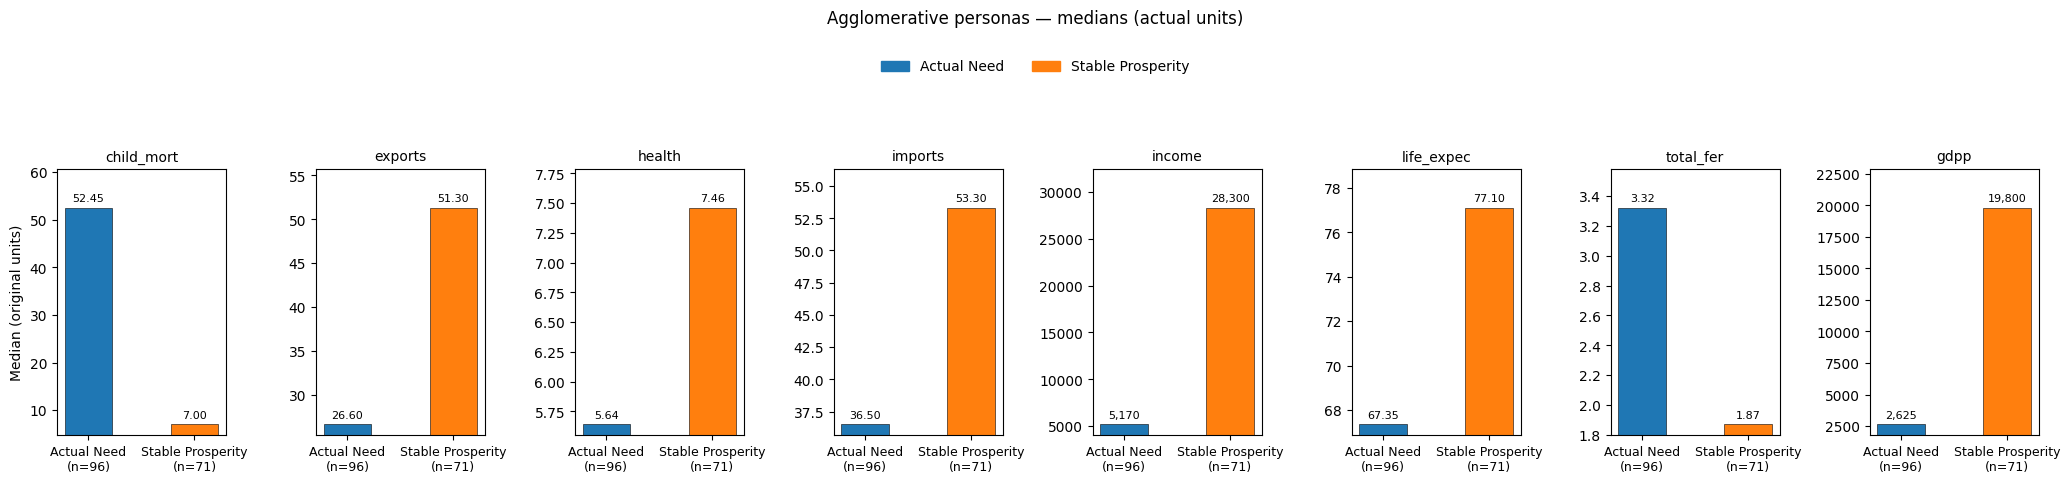

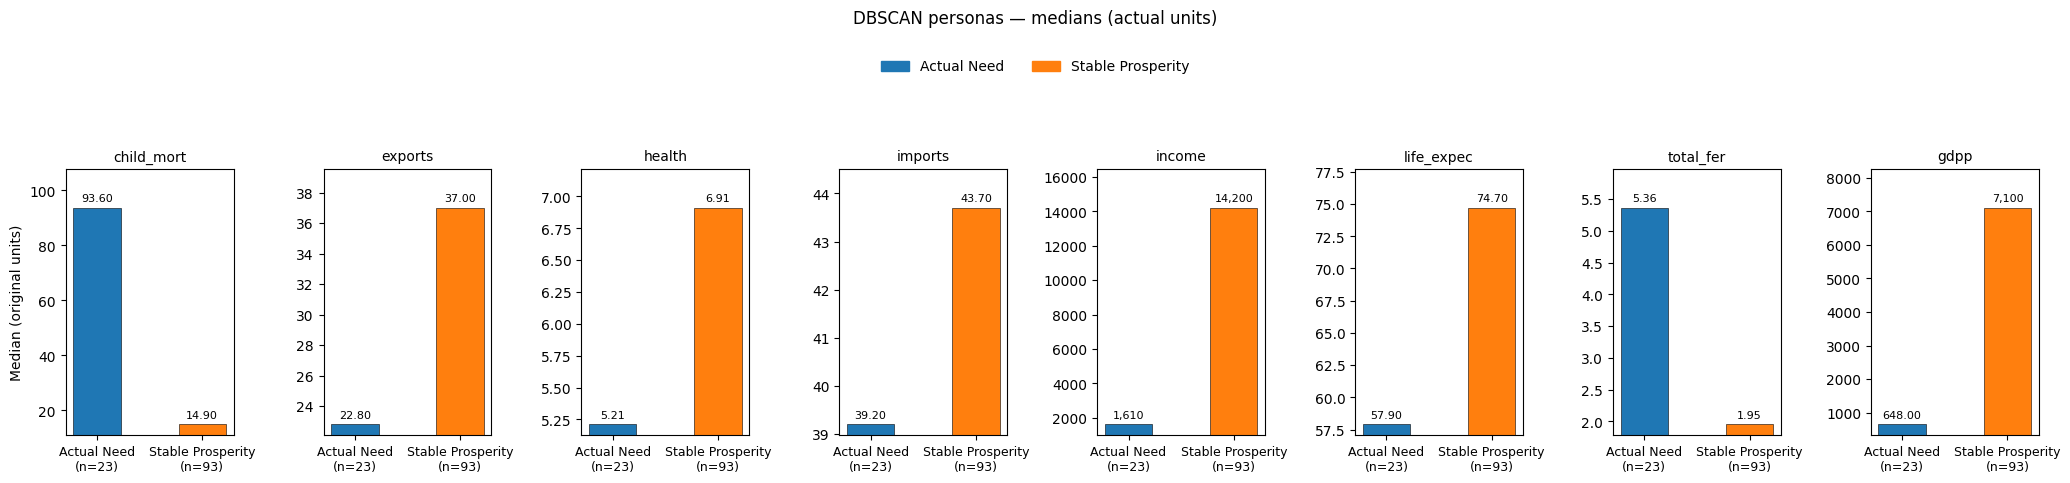

In [106]:
# ===== Cluster Personas with REAL NAMES (“Actual Need”, “Stable Prosperity”) =====
# Copy–paste and run after your dataframe `df` already has the aligned labels:
#   df["cl_kmeans2"], df["cl_hier2"], and (optionally) df["cl_dbscan2"] (with -1 as noise)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Features to summarize (keep only those present) ---
ALL_FEATURES = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
FEATURES = [c for c in ALL_FEATURES if c in df.columns]

# --- Simple palette (blue/orange for 0/1; grey for -1) ---
def make_palette(labels, cmap_name="tab10"):
    uniq = sorted(set(int(x) for x in np.unique(labels)))
    cmap = plt.get_cmap(cmap_name, max(10, len(uniq)))
    pal = {}
    for i, u in enumerate([u for u in uniq if u != -1]):
        pal[u] = cmap(i % cmap.N)
    pal[-1] = "#BDBDBD"
    return pal

# --- Infer which numeric id is “Actual Need” vs “Stable Prosperity” using a simple need score ---
def infer_name_map_from_scores(labels, df_):
    # Need score: (+) child_mort, total_fer, inflation; (–) life_expec, income, gdpp
    cols_pos = [c for c in ['child_mort','total_fer','inflation'] if c in df_.columns]
    cols_neg = [c for c in ['life_expec','income','gdpp'] if c in df_.columns]
    Z = df_[cols_pos + cols_neg].copy().astype(float)
    Z = (Z - Z.mean()) / (Z.std(ddof=0).replace(0,1))
    need = Z[cols_pos].sum(axis=1) - Z[cols_neg].sum(axis=1)
    labs = [c for c in np.unique(labels) if c != -1]
    if len(labs) < 2:  # fallback
        return {0:"Actual Need", 1:"Stable Prosperity", -1:"Noise"}
    need_means = {int(c): float(need[np.asarray(labels)==c].mean()) for c in labs}
    need_id = max(need_means, key=need_means.get)
    pros_id = [c for c in labs if c != need_id][0]
    return {int(need_id): "Actual Need", int(pros_id): "Stable Prosperity", -1: "Noise"}

# --- Build cluster cards (medians + n + example country names) ---
def cluster_cards(df_, labels, name="cluster", k_examples=6):
    t = df_.copy()
    t[name] = labels
    g = t.groupby(name, dropna=False)
    med = g[FEATURES].median().round(2)
    n   = g.size().rename("n")
    ex  = g['country'].apply(lambda s: ", ".join(s.head(k_examples)))
    out = med.copy()
    out.insert(0, "n", n)
    out["examples"] = ex
    return out.sort_index()

# --- Persona bar-row plot, now with a name_map arg for friendly labels ---
def plot_feature_row(cards_df, features, cluster_colors,
                     cluster_order=None,
                     title="Cluster personas — medians (actual units)",
                     annotate=True, sharey=False, bar_width=0.55,
                     height=4.2,
                     legend_out=True,
                     legend_pos="top",
                     legend_y=1.05,
                     title_y=1.14,
                     legend_ncols=None,
                     name_map=None):

    if cluster_order is None:
        cluster_order = list(cards_df.index)

    def _lname(c):
        try:
            c = int(c)
        except Exception:
            pass
        return name_map.get(c, f"Cluster {c}") if name_map else f"Cluster {c}"

    feats = [f for f in features if f in cards_df.columns]
    nF = len(feats)
    fig, axes = plt.subplots(1, nF, figsize=(max(6, 2.6*nF), height),
                             sharey=sharey, constrained_layout=False)
    if nF == 1:
        axes = [axes]

    def _fmt(v): return f"{v:,.0f}" if abs(v) >= 1000 else f"{v:.2f}"

    for ax, feat in zip(axes, feats):
        y = cards_df.loc[cluster_order, feat].values.astype(float)
        x = np.arange(len(cluster_order))
        colors = [cluster_colors[c] for c in cluster_order]

        bars = ax.bar(x, y, width=bar_width, color=colors, edgecolor="black", linewidth=0.4)

        y_max, y_min = float(y.max()), float(y.min())
        span = (y_max - y_min) if (y_max != y_min) else (abs(y_max) or 1.0)
        pad_top = 0.18 * span
        ax.set_ylim(y_min - 0.05*span, y_max + pad_top)

        ax.set_title(feat, fontsize=10, pad=6)
        xt = [f"{_lname(c)}\n(n={int(cards_df.loc[c,'n'])})" if "n" in cards_df.columns else _lname(c)
              for c in cluster_order]
        ax.set_xticks(x)
        ax.set_xticklabels(xt, fontsize=9)
        ax.axhline(0, color="k", lw=0.5)

        if annotate:
            off = 0.02 * span
            for xi, yi in zip(x, y):
                ax.text(xi, yi + (off if yi >= 0 else -off),
                        _fmt(yi), ha="center",
                        va=("bottom" if yi >= 0 else "top"),
                        fontsize=8, clip_on=False)

    axes[0].set_ylabel("Median (original units)")

    handles = [Patch(color=cluster_colors[c], label=_lname(c)) for c in cluster_order]
    if legend_ncols is None:
        legend_ncols = min(len(cluster_order), 6)

    if legend_out and legend_pos == "top":
        fig.legend(handles=handles, loc="upper center",
                   bbox_to_anchor=(0.5, legend_y),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=title_y, fontsize=12)
        fig.tight_layout(rect=[0, 0, 1, min(0.92, legend_y - 0.04)])
    elif legend_out and legend_pos == "bottom":
        fig.legend(handles=handles, loc="lower center",
                   bbox_to_anchor=(0.5, -0.06),
                   ncols=legend_ncols, frameon=False)
        fig.suptitle(title, y=0.99, fontsize=12)
        fig.tight_layout(rect=[0, 0.06, 1, 0.95])
    else:
        axes[-1].legend(handles=handles, frameon=False, loc="best")
        fig.suptitle(title, fontsize=12)
        fig.tight_layout()
    plt.show()

# ========================= Run: build cards & plot with REAL NAMES =========================
# Palette comes from KMeans labels so colors stay consistent across methods
pal = make_palette(df["cl_kmeans2"].to_numpy())

# Decide which numeric id = “Actual Need” vs “Stable Prosperity”
NAME_MAP = infer_name_map_from_scores(df["cl_kmeans2"].to_numpy(), df)

# Build “persona” tables
cards_km = cluster_cards(df, df["cl_kmeans2"].to_numpy(), name="km")
cards_ag = cluster_cards(df, df["cl_hier2"].to_numpy(),  name="agg")
cards_db = None
if "cl_dbscan2" in df.columns:
    m = (df["cl_dbscan2"].to_numpy() != -1)
    if m.any():
        cards_db = cluster_cards(df.loc[m], df.loc[m, "cl_dbscan2"].to_numpy(), name="db")

# Consistent cluster order (use numeric ids so palettes match)
order = sorted(cards_km.index.tolist())

# Plot rows with SAME palette and REAL NAMES
plot_feature_row(cards_km, FEATURES, pal,
                 cluster_order=order,
                 title="KMeans personas — medians (actual units)",
                 legend_out=True, legend_pos="top",
                 legend_y=1.05, title_y=1.14,
                 bar_width=0.45, height=4.2,
                 name_map=NAME_MAP)

plot_feature_row(cards_ag, FEATURES, pal,
                 cluster_order=order,
                 title="Agglomerative personas — medians (actual units)",
                 legend_out=True, legend_pos="top",
                 legend_y=1.05, title_y=1.14,
                 bar_width=0.45, height=4.2,
                 name_map=NAME_MAP)

if cards_db is not None:
    plot_feature_row(cards_db, FEATURES, pal,
                     cluster_order=order,
                     title="DBSCAN personas — medians (actual units)",
                     legend_out=True, legend_pos="top",
                     legend_y=1.05, title_y=1.14,
                     bar_width=0.45, height=4.2,
                     name_map=NAME_MAP)


In [92]:
# --- 0) pick features you used (adjust if needed) ---
FEATURES = ['child_mort','life_expec','health','inflation','total_fer',
            'income','gdpp','trade_openness','trade_gap']
FEATURES = [c for c in FEATURES if c in df.columns]

# --- 1) ensure KMeans labels in df['km'] ---
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

k = 2  # your chosen k

if 'km' not in df.columns:
    if 'cl_kmeans' in df.columns:
        df['km'] = df['cl_kmeans'].astype(int)
    else:
        # assume you already have X_std; if not, build it from FEATURES with your scaler
        km_model = KMeans(n_clusters=k, n_init=50, random_state=42)
        df['km'] = km_model.fit_predict(X_std).astype(int)

# (optional) also expose hierarchical labels consistently
if 'agg' not in df.columns:
    if 'cl_hier' in df.columns:
        df['agg'] = df['cl_hier'].astype(int)
    else:
        agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
        df['agg'] = agg.fit_predict(X_std).astype(int)

# --- 2) assign human-readable names robustly ---
# Decide which cluster is "Acute Need" by higher child mortality median
cm_med = df.groupby('km')['child_mort'].median()
acute_id   = int(cm_med.idxmax())
prosper_id = int(cm_med.idxmin())
km_name = {prosper_id: "Stable Prosperity", acute_id: "Acute Need"}
df['cluster_name'] = df['km'].map(km_name)

print("Cluster id → name mapping:", km_name)

# --- 3) cluster cards (medians in original units) ---
def cluster_cards(df, labels, features, name="cluster", k_examples=6, round_to=2, drop_noise=False):
    t = df.copy(); t[name] = labels
    if drop_noise:
        t = t[t[name] != -1]
    feats = [c for c in features if c in t.columns]
    g = t.groupby(name, dropna=False)
    med = g[feats].median(numeric_only=True).round(round_to)
    n   = g.size().rename("n")
    ex  = g['country'].apply(lambda s: ", ".join(s.head(k_examples)))
    cards = med.copy(); cards.insert(0, "n", n); cards["examples"] = ex
    return cards.sort_index()

cards_km = cluster_cards(df, df['km'].to_numpy(), FEATURES, name="km")
cards_ag = cluster_cards(df, df['agg'].to_numpy(), FEATURES, name="agg")
display(cards_km)
display(cards_ag)


Cluster id → name mapping: {0: 'Stable Prosperity', 1: 'Acute Need'}


,n,child_mort,life_expec,health,inflation,total_fer,income,gdpp,examples
km,,,,,,,,,
0,94,10.1,76.45,7.40,3.02,1.87,20250.0,12150.0,"Albania, Antigua and Barbuda, Argentina, Armen..."
1,73,63.7,62.90,5.25,8.78,4.37,2790.0,1220.0,"Afghanistan, Algeria, Angola, Bangladesh, Beni..."


,n,child_mort,life_expec,health,inflation,total_fer,income,gdpp,examples
agg,,,,,,,,,
0,96,52.45,67.35,5.64,8.09,3.32,5170.0,2625.0,"Afghanistan, Albania, Algeria, Angola, Argenti..."
1,71,7.00,77.10,7.46,2.01,1.87,28300.0,19800.0,"Antigua and Barbuda, Australia, Austria, Baham..."


In [93]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Z = X_std  # standardized feature matrix you used for KMeans
km_labels = df["km"].to_numpy()

sil = silhouette_score(Z, km_labels)
ch  = calinski_harabasz_score(Z, km_labels)
db  = davies_bouldin_score(Z, km_labels)
print(f"Silhouette={sil:.3f}  Calinski–Harabasz={ch:.1f}  Davies–Bouldin={db:.3f}")


Silhouette=0.286  Calinski–Harabasz=84.7  Davies–Bouldin=1.320


In [94]:
from pathlib import Path
import pandas as pd

# --- 1) Make sure output folder exists ---
outdir = Path("reports")
outdir.mkdir(parents=True, exist_ok=True)

# --- 2) Priority Index (robust) ---
PI_WEIGHTS = {"child_mort":+1, "total_fer":+1, "inflation":+1,
              "life_expec":-1, "income":-1, "gdpp":-1}

cols = [c for c in PI_WEIGHTS if c in df.columns]  # only keep present columns

def compute_pi(df_):
    Z = df_[cols].copy()
    # flip “good” metrics so larger = worse for all
    for c, s in PI_WEIGHTS.items():
        if c in Z and s < 0:
            Z[c] = -Z[c]
    # z-score with zero-std guard
    std = Z.std(ddof=0).replace(0, 1)
    Z = (Z - Z.mean()) / std
    return Z.mean(axis=1)  # equal-weight average

df["priority_index"] = compute_pi(df)

# --- 3) Ranked tables ---
if "cluster_name" not in df.columns and "km" in df.columns:
    # fallback name mapping by child mortality
    cm_med = df.groupby("km")["child_mort"].median()
    km_name = {int(cm_med.idxmin()): "Stable Prosperity",
               int(cm_med.idxmax()): "Acute Need"}
    df["cluster_name"] = df["km"].map(km_name)

top_global = (df.sort_values("priority_index", ascending=False)
                [["country","cluster_name","priority_index","child_mort","life_expec","income","gdpp"]]
                .head(15))

top_within = (df.sort_values("priority_index", ascending=False)
                .groupby("cluster_name", group_keys=False)
                .head(10)
                [["country","cluster_name","priority_index","child_mort","life_expec","income","gdpp"]])

display(top_global)
display(top_within)

# --- 4) Save to reports/ ---
top_global.to_csv(outdir / "table_top15_global_priority.csv", index=False)
top_within.to_csv(outdir / "table_top10_within_cluster.csv", index=False)


,country,cluster_name,priority_index,child_mort,life_expec,income,gdpp
37,"Congo, Dem. Rep.",Acute Need,1.652826,116.000,57.50,609.0,334.0
113,Nigeria,Acute Need,1.582255,130.000,60.50,5150.0,2330.0
132,Sierra Leone,Acute Need,1.572535,142.875,55.00,1220.0,399.0
3,Angola,Acute Need,1.508399,119.000,60.10,5900.0,3530.0
32,Chad,Acute Need,1.412961,142.875,56.50,1930.0,897.0
63,Guinea,Acute Need,1.351252,109.000,58.00,1190.0,648.0
31,Central African Republic,Acute Need,1.334225,142.875,48.05,888.0,446.0
26,Burundi,Acute Need,1.308266,93.600,57.70,764.0,231.0
97,Mali,Acute Need,1.277146,137.000,59.50,1870.0,708.0
166,Zambia,Acute Need,1.275957,83.100,52.00,3280.0,1460.0


,country,cluster_name,priority_index,child_mort,life_expec,income,gdpp
37,"Congo, Dem. Rep.",Acute Need,1.652826,116.000,57.50,609.0,334.0
113,Nigeria,Acute Need,1.582255,130.000,60.50,5150.0,2330.0
132,Sierra Leone,Acute Need,1.572535,142.875,55.00,1220.0,399.0
3,Angola,Acute Need,1.508399,119.000,60.10,5900.0,3530.0
32,Chad,Acute Need,1.412961,142.875,56.50,1930.0,897.0
63,Guinea,Acute Need,1.351252,109.000,58.00,1190.0,648.0
31,Central African Republic,Acute Need,1.334225,142.875,48.05,888.0,446.0
26,Burundi,Acute Need,1.308266,93.600,57.70,764.0,231.0
97,Mali,Acute Need,1.277146,137.000,59.50,1870.0,708.0
166,Zambia,Acute Need,1.275957,83.100,52.00,3280.0,1460.0


In [95]:
import numpy as np, pandas as pd

BUDGET = 10_000_000
MIN_PER_COUNTRY = 75_000
MAX_PER_COUNTRY = 1_000_000

df_pos = df[df["priority_index"] > 0].copy()
mass = df_pos.groupby("cluster_name")["priority_index"].sum()
share = (mass / mass.sum()).fillna(0)
cluster_budget = (share * BUDGET).round(-3)

rows = []
for cl, sub in df_pos.groupby("cluster_name"):
    pool = cluster_budget.get(cl, 0.0)
    if pool <= 0 or len(sub) == 0: continue
    w = (sub["priority_index"].clip(lower=0))
    w = w / w.sum()
    alloc = (w * pool).clip(lower=MIN_PER_COUNTRY, upper=MAX_PER_COUNTRY)

    # re-normalize to hit the exact pool after clipping
    alloc = alloc * (pool / alloc.sum())
    tmp = sub[["country","cluster_name"]].copy()
    tmp["allocation_usd"] = alloc.round(-2).values
    rows.append(tmp)

allocations = (pd.concat(rows).sort_values(["cluster_name","allocation_usd"], ascending=[True, False]))
display(allocations.head(20))
allocations.to_csv("reports/table_allocation_proposal.csv", index=False)


,country,cluster_name,allocation_usd
37,"Congo, Dem. Rep.",Acute Need,275500.0
113,Nigeria,Acute Need,263800.0
132,Sierra Leone,Acute Need,262100.0
3,Angola,Acute Need,251400.0
32,Chad,Acute Need,235500.0
63,Guinea,Acute Need,225200.0
31,Central African Republic,Acute Need,222400.0
26,Burundi,Acute Need,218100.0
97,Mali,Acute Need,212900.0
166,Zambia,Acute Need,212700.0


In [96]:
FEATURES = ['child_mort','life_expec','health','inflation','total_fer','income','gdpp']
cards = cards_km.copy()  # your table with medians & examples
g_med = df[FEATURES].median()
g_std = df[FEATURES].std(ddof=0).replace(0, 1)
z = (cards[FEATURES] - g_med) / g_std

def bullets(zrow, top_k=3):
    ups = zrow.sort_values(ascending=False).head(top_k)
    dns = zrow.sort_values(ascending=True).head(top_k)
    up = "; ".join([f"{k} (↑{v:+.2f}σ)" for k,v in ups.items()])
    dn = "; ".join([f"{k} (↓{v:+.2f}σ)" for k,v in dns.items()])
    return pd.Series({"top_up": up, "top_down": dn})

cards[["top_up","top_down"]] = z.apply(bullets, axis=1)
display(cards[["n","examples","top_up","top_down"] + FEATURES])
cards.to_csv("reports/cluster_personas_kmeans.csv")


,n,examples,top_up,top_down,child_mort,life_expec,health,inflation,total_fer,income,gdpp
km,,,,,,,,,,,
0,94,"Albania, Antigua and Barbuda, Argentina, Armen...",income (↑+0.68σ); gdpp (↑+0.65σ); health (↑+0....,total_fer (↓-0.36σ); inflation (↓-0.35σ); chil...,10.1,76.45,7.40,3.02,1.87,20250.0,12150.0
1,73,"Afghanistan, Algeria, Angola, Bangladesh, Beni...",total_fer (↑+1.31σ); child_mort (↑+1.16σ); inf...,life_expec (↓-1.20σ); income (↓-0.47σ); health...,63.7,62.90,5.25,8.78,4.37,2790.0,1220.0


In [97]:
rare = df.loc[df["cl_dbscan"] == -1, ["country","child_mort","life_expec","income","gdpp","inflation"]]
rare.to_csv("reports/table_dbscan_rare_profiles.csv", index=False)
print(f"Rare/atypical profiles flagged by DBSCAN: {len(rare)}")


Rare/atypical profiles flagged by DBSCAN: 51


In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
rng = np.random.default_rng(42)

def labels_km2(X): return KMeans(n_clusters=2, n_init=50, random_state=42).fit_predict(X_std)

base = labels_km2(X_std)
aris = []
for _ in range(200):
    idx = rng.integers(0, X_std.shape[0], X_std.shape[0])
    aris.append(adjusted_rand_score(base[idx], labels_km2(X_std[idx])))
print(f"Stability (bootstrap ARI) ≈ {np.mean(aris):.2f} ± {np.std(aris):.02f}")


Stability (bootstrap ARI) ≈ 0.00 ± 0.01


In [99]:
if 'inflation' in df.columns and 'gdp_growth' not in df.columns:
    df = df.rename(columns={'inflation':'gdp_growth'})


Using NAME_MAP: {np.int64(0): 'Actual Need', np.int64(1): 'Stable Prosperity', -1: 'Noise'}

Logistic regression (standardized) — positive class = 'Actual Need'


,feature,coef,abs_coef,odds_ratio
0,life_expec,-2.022425,2.022425,0.132334
1,total_fer,1.911904,1.911904,6.765960
2,child_mort,1.305880,1.305880,3.690937
3,gdpp,-0.941196,0.941196,0.390161
4,health,-0.856669,0.856669,0.424574
5,income,-0.828682,0.828682,0.436625



Classification report (LogReg):
                    precision    recall  f1-score   support

Stable Prosperity       0.97      0.97      0.97        94
      Actual Need       0.96      0.96      0.96        73

         accuracy                           0.96       167
        macro avg       0.96      0.96      0.96       167
     weighted avg       0.96      0.96      0.96       167

Confusion matrix (rows=true, cols=pred):
 [[91  3]
 [ 3 70]]


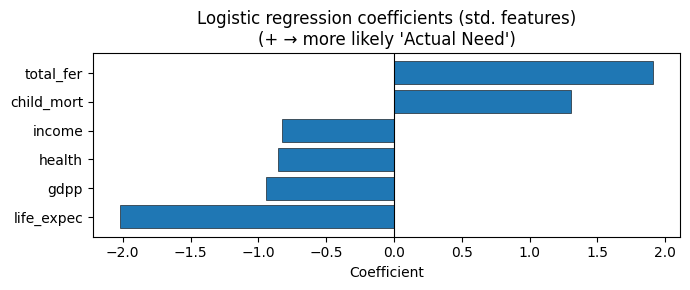


Decision Tree importances:


,feature,importance
0,child_mort,0.892193
1,life_expec,0.087375
2,gdpp,0.016809
3,total_fer,0.003624
4,health,0.000000
5,income,0.000000



Decision Tree rules (text view):
|--- child_mort <= 25.60
|   |--- life_expec <= 70.10
|   |   |--- class: 1
|   |--- life_expec >  70.10
|   |   |--- gdpp <= 3565.00
|   |   |   |--- class: 0
|   |   |--- gdpp >  3565.00
|   |   |   |--- class: 0
|--- child_mort >  25.60
|   |--- life_expec <= 71.85
|   |   |--- total_fer <= 2.53
|   |   |   |--- class: 1
|   |   |--- total_fer >  2.53
|   |   |   |--- class: 1
|   |--- life_expec >  71.85
|   |   |--- class: 0



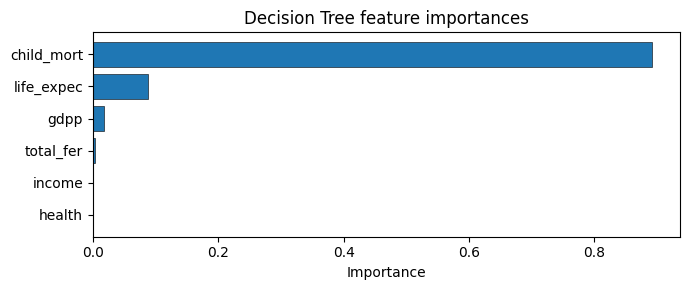

In [100]:
# ============================
# Feature contributions for K-Means labels
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix

# ----------------------------
# 0) Inputs & basic checks
# ----------------------------
assert "df" in globals(), "df not found"

# y (KMeans labels): prefer aligned/oriented column if present
if "cl_kmeans2" in df.columns:
    y = df["cl_kmeans2"].to_numpy()
elif "cl_kmeans" in df.columns:
    y = df["cl_kmeans"].to_numpy()
else:
    raise AssertionError("Need df['cl_kmeans2'] or df['cl_kmeans'] for the target.")

# X (features): auto-pick numeric columns if FEATURES not set
if "FEATURES" in globals():
    FEATURES_USE = [c for c in FEATURES if c in df.columns]
    assert len(FEATURES_USE) > 0, "FEATURES has no valid columns in df."
else:
    ban = {"country", "cl_kmeans2", "cl_kmeans", "cl_hier2", "cl_hier", "cl_dbscan2", "cl_dbscan"}
    FEATURES_USE = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ban]
    assert len(FEATURES_USE) > 0, "No numeric feature columns found."

X = df[FEATURES_USE].to_numpy(dtype=float)

# ----------------------------
# 1) Helper: simple “need” score + name-map inference
# ----------------------------
# If you already defined NAME_MAP = {id: "Actual Need", id: "Stable Prosperity", -1:"Noise"} it will be used.
DEFAULT_NEED_FEATURES = ["child_mort","total_fer","income","gdpp","life_expec","inflation"]

def _need_score(df):
    cols = [c for c in DEFAULT_NEED_FEATURES if c in df.columns]
    if len(cols) < 3:
        # fallback: z-score all features and treat higher total as "prosperity"; need = -pros
        Z = (df[FEATURES_USE] - df[FEATURES_USE].mean()) / (df[FEATURES_USE].std(ddof=0) + 1e-12)
        return -Z.sum(axis=1).to_numpy(dtype=float)
    M = df[cols].to_numpy(float)
    Z = (M - M.mean(0)) / (M.std(0, ddof=0) + 1e-12)
    idx = {c:i for i,c in enumerate(cols)}
    need = (+ (Z[:, idx.get("child_mort", 0)] if "child_mort" in cols else 0)
            + (Z[:, idx.get("total_fer", 0)]  if "total_fer"  in cols else 0)
            - (Z[:, idx.get("income", 0)]     if "income"     in cols else 0)
            - (Z[:, idx.get("gdpp", 0)]       if "gdpp"       in cols else 0)
            - (Z[:, idx.get("life_expec", 0)] if "life_expec" in cols else 0)
            + 0.3 * (Z[:, idx.get("inflation", 0)] if "inflation" in cols else 0))
    return need.astype(float)

def infer_name_map_from_scores(labels, df):
    labs = [c for c in np.unique(labels) if c != -1]
    if len(labs) < 2:
        raise ValueError("This explainer expects at least 2 clusters.")
    # If more than 2, pick two most common (so we can do binary LR cleanly)
    if len(labs) > 2:
        vals, cnt = np.unique(labels[labels != -1], return_counts=True)
        labs = list(vals[np.argsort(cnt)[-2:]])
    need = _need_score(df)
    mean_need = {int(c): float(np.mean(need[labels == c])) for c in labs}
    need_id = max(mean_need, key=mean_need.get)
    pros_id = [c for c in labs if c != need_id][0]
    return {need_id: "Actual Need", pros_id: "Stable Prosperity", -1: "Noise"}

if "NAME_MAP" in globals() and ("Actual Need" in set(NAME_MAP.values())):
    name_map = dict(NAME_MAP)
else:
    name_map = infer_name_map_from_scores(y, df)
print("Using NAME_MAP:", name_map)

# Reduce to exactly the two clusters we’re explaining (ignore any extras/noise just in case)
keep_mask = np.isin(y, [c for c in name_map.keys() if c != -1])
X2 = X[keep_mask]
y2 = y[keep_mask]

labs_two = sorted([c for c in np.unique(y2) if c != -1])
if len(labs_two) != 2:
    raise ValueError("Need exactly two KMeans clusters for binary explanation.")

need_id = [k for k,v in name_map.items() if v == "Actual Need"][0]
pros_id = [k for k,v in name_map.items() if v == "Stable Prosperity"][0]

# Map to binary {0,1}: positive class = "Actual Need"
y_bin = (y2 == need_id).astype(int)

# ----------------------------
# 2) Logistic Regression (standardized)
# ----------------------------
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])
logit.fit(X2, y_bin)

# Coefficients correspond to positive class (Actual Need) for binary LR
coef = logit.named_steps["clf"].coef_[0]
odds = np.exp(coef)

coef_df = (pd.DataFrame({
    "feature": FEATURES_USE,
    "coef": coef,
    "abs_coef": np.abs(coef),
    "odds_ratio": odds
})
 .sort_values("abs_coef", ascending=False)
 .reset_index(drop=True)
)

print("\nLogistic regression (standardized) — positive class = 'Actual Need'")
display(coef_df.head(20))

# Quick diagnostics
yhat = logit.predict(X2)
print("\nClassification report (LogReg):\n", classification_report(y_bin, yhat, target_names=["Stable Prosperity","Actual Need"]))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_bin, yhat))

# Plot coefficients
plt.figure(figsize=(7, max(3, 0.35*len(FEATURES_USE))))
order = np.argsort(coef)
plt.barh(np.array(FEATURES_USE)[order], coef[order], edgecolor="black", linewidth=0.4)
plt.axvline(0, color="k", lw=0.8)
plt.title("Logistic regression coefficients (std. features)\n(+ → more likely 'Actual Need')")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

# ----------------------------
# 3) Compact Decision Tree (rules + importances)
# ----------------------------
tree = DecisionTreeClassifier(
    max_depth=3,            # shallow = interpretable
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)
tree.fit(X2, y_bin)

imp = tree.feature_importances_
imp_df = (pd.DataFrame({"feature": FEATURES_USE, "importance": imp})
          .sort_values("importance", ascending=False)
          .reset_index(drop=True))
print("\nDecision Tree importances:")
display(imp_df.head(20))

print("\nDecision Tree rules (text view):")
print(export_text(tree, feature_names=FEATURES_USE))

# Plot importances
plt.figure(figsize=(7, max(3, 0.35*len(FEATURES_USE))))
order = np.argsort(imp)
plt.barh(np.array(FEATURES_USE)[order], imp[order], edgecolor="black", linewidth=0.4)
plt.title("Decision Tree feature importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


,country,cluster_name,priority_index,alloc_priority_usd,radius_dist,alloc_radius_usd
0,"Congo, Dem. Rep.",Acute Need,1.652826,280100.0,2.153574,89700.0
1,Nigeria,Acute Need,1.582255,268200.0,1.897297,101800.0
2,Sierra Leone,Acute Need,1.572535,266500.0,3.457862,74600.0
3,Angola,Acute Need,1.508399,255700.0,2.144823,90000.0
4,Chad,Acute Need,1.412961,239500.0,2.593350,74600.0
5,Guinea,Acute Need,1.351252,229000.0,1.413775,136600.0
6,Central African Republic,Acute Need,1.334225,226100.0,2.740527,74600.0
7,Burundi,Acute Need,1.308266,221700.0,2.648641,74600.0
8,Mali,Acute Need,1.277146,216500.0,2.355564,82000.0
9,Zambia,Acute Need,1.275957,216300.0,1.509566,127900.0


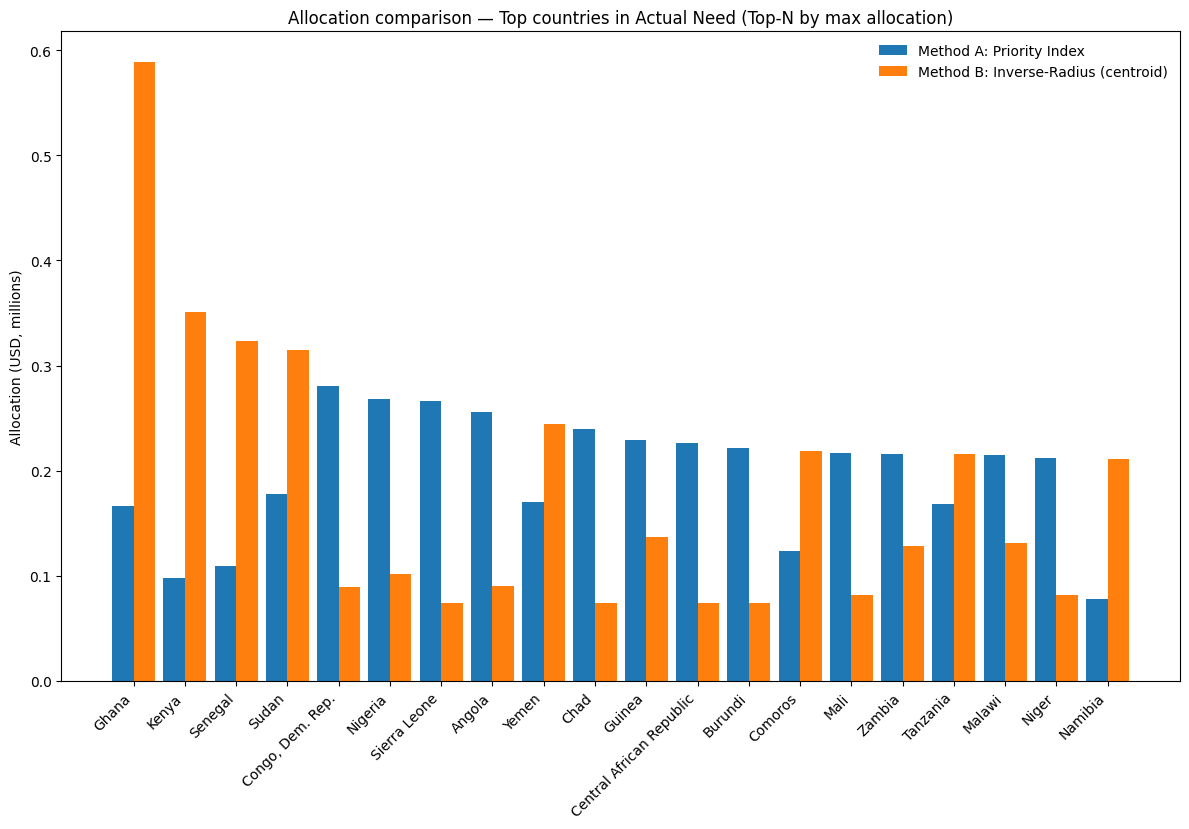

In [101]:
# =========================================
# CONFIG
# =========================================
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Budget knobs (same semantics as your code)
BUDGET = 10_000_000
MIN_PER_COUNTRY = 75_000
MAX_PER_COUNTRY = 1_000_000

# Feature candidates to compute centroid/radius (we'll keep those that exist)
RADIUS_FEATURES_CANDIDATES = [
    "child_mort", "total_fer", "income", "gdpp", "life_expec", "inflation", "health"
]

# Output folder
outdir = Path("reports")
outdir.mkdir(parents=True, exist_ok=True)

# =========================================
# 0) Basic checks
# =========================================
assert "df" in globals(), "df not found"
assert "country" in df.columns, "df must have a 'country' column"
assert "priority_index" in df.columns, (
    "Expected df['priority_index']. Compute it first (your compute_pi block)."
)

# =========================================
# 1) Identify the Actual-Need cluster
# =========================================
def _need_name(row):
    """Return canonical name bucket for cluster_name-like strings."""
    if pd.isna(row): return None
    s = str(row).strip().lower()
    if "need" in s:
        # catch "actual need", "acute need", "needs", etc.
        return "Actual Need"
    if "prosper" in s:
        return "Stable Prosperity"
    return row  # leave as-is otherwise

need_mask = None

if "cluster_name" in df.columns:
    cn = df["cluster_name"].apply(_need_name)
    if (cn == "Actual Need").any():
        need_mask = (cn == "Actual Need")

if need_mask is None:
    # Try from numeric cluster id columns if present
    candidates = []
    if "km" in df.columns: candidates.append("km")
    if "cl_kmeans2" in df.columns: candidates.append("cl_kmeans2")

    if len(candidates) == 0:
        raise AssertionError(
            "Could not find 'cluster_name' with a Need-like label, "
            "or a numeric KMeans label column ('km' / 'cl_kmeans2')."
        )

    # pick first available numeric label column and infer via child_mort median
    col = candidates[0]
    grp = df.groupby(col)["child_mort"].median()
    need_cluster_id = int(grp.idxmax())  # higher child mortality => Actual Need
    # Create cluster_name to keep downstream code simple
    mapping = {need_cluster_id: "Actual Need"}
    # pick a second id (if available) as prosperity
    others = [int(k) for k in grp.index if int(k) != need_cluster_id]
    if len(others) > 0:
        mapping[others[0]] = "Stable Prosperity"
    df["cluster_name"] = df[col].map(mapping).fillna("Other")
    need_mask = df["cluster_name"].eq("Actual Need")

# Sanity: ensure we have recipients
if need_mask.sum() == 0:
    raise AssertionError("No rows detected as 'Actual Need' — check your cluster labels.")

need_df = df.loc[need_mask].copy()

# =========================================
# 2) Method A — Priority Index Allocation (need cluster only)
# =========================================
def allocate_from_weights(weights, budget, min_per, max_per):
    """
    Allocate budget proportionally to weights, then clip to [min,max],
    and renormalize to hit the *exact* budget (same spirit as your code).
    """
    w = np.asarray(weights, dtype=float).clip(min=0)
    if w.sum() == 0:
        # edge case: equal split if all weights are zero
        w = np.ones_like(w, dtype=float)
    raw = w / w.sum() * budget
    clipped = np.clip(raw, min_per, max_per)

    # Renormalize to exact budget (note: may overshoot min/max a bit after scaling)
    scale = budget / clipped.sum()
    final = clipped * scale
    return final

# weights based on positive PI within need cluster only
wA = need_df["priority_index"].clip(lower=0)
alloc_A = allocate_from_weights(wA, BUDGET, MIN_PER_COUNTRY, MAX_PER_COUNTRY)

# =========================================
# 3) Method B — Centroid-Inverse-Radius (need cluster only)
# =========================================
features_B = [c for c in RADIUS_FEATURES_CANDIDATES if c in df.columns]
if len(features_B) < 3:
    # fallback: use all numeric except obvious non-features
    ban = {"country", "cluster_name", "priority_index", "km", "cl_kmeans2", "cl_hier2",
           "cl_dbscan2", "cl_hier", "cl_dbscan"}
    features_B = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ban]

# z-score across the *whole dataset* (stable scale), then compute centroid over need cluster
X_all = df[features_B].to_numpy(dtype=float)
mean_all = X_all.mean(axis=0)
std_all = X_all.std(axis=0, ddof=0)
std_all = np.where(std_all == 0, 1.0, std_all)
Z_all = (X_all - mean_all) / std_all

Z_need = Z_all[need_mask.to_numpy()]
centroid = Z_need.mean(axis=0)

# radius per need-country
dist = np.linalg.norm(Z_need - centroid, axis=1)
eps = 1e-6
wB = 1.0 / (dist + eps)  # smaller radius -> larger weight
alloc_B = allocate_from_weights(wB, BUDGET, MIN_PER_COUNTRY, MAX_PER_COUNTRY)

# =========================================
# 4) Combine & Save
# =========================================
comp = need_df[["country", "cluster_name", "priority_index"]].copy()
comp["alloc_priority_usd"] = np.round(alloc_A, -2)
comp["radius_dist"] = dist
comp["alloc_radius_usd"] = np.round(alloc_B, -2)

# Rank columns for convenience
comp = comp.sort_values("alloc_priority_usd", ascending=False, ignore_index=True)

# Save CSV
comp.to_csv(outdir / "allocation_need_only_compare.csv", index=False)
display(comp.head(20))

# =========================================
# 5) Visualizations (blog-friendly)
# =========================================
TOP_N = min(20, len(comp))

# (A) Grouped bars: Top-N by max of the two allocations
comp_top = comp.copy()
comp_top["alloc_max"] = comp_top[["alloc_priority_usd", "alloc_radius_usd"]].max(axis=1)
comp_top = comp_top.sort_values("alloc_max", ascending=False).head(TOP_N)

x = np.arange(len(comp_top))
width = 0.42

plt.figure(figsize=(12, max(5, 0.42*TOP_N)))
plt.bar(x - width/2, comp_top["alloc_priority_usd"]/1e6, width,
        label="Method A: Priority Index")
plt.bar(x + width/2, comp_top["alloc_radius_usd"]/1e6, width,
        label="Method B: Inverse-Radius (centroid)")
plt.xticks(x, comp_top["country"], rotation=45, ha="right")
plt.ylabel("Allocation (USD, millions)")
plt.title("Allocation comparison — Top countries in Actual Need (Top-N by max allocation)")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()



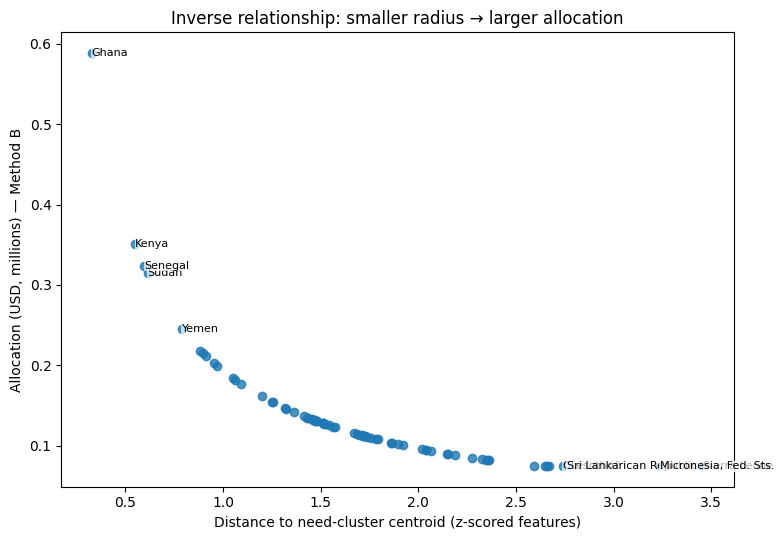

In [102]:

# (B) Scatter: radius vs allocation (Method B)
plt.figure(figsize=(8, 5.5))
plt.scatter(comp["radius_dist"], comp["alloc_radius_usd"]/1e6, s=36, alpha=0.8)
plt.xlabel("Distance to need-cluster centroid (z-scored features)")
plt.ylabel("Allocation (USD, millions) — Method B")
plt.title("Inverse relationship: smaller radius → larger allocation")
# Optional: label a few extremes
lab_idx = np.r_[comp["radius_dist"].nsmallest(5).index.values,
                comp["radius_dist"].nlargest(5).index.values]
for i in np.unique(lab_idx):
    r = comp.loc[i]
    plt.text(r["radius_dist"], r["alloc_radius_usd"]/1e6, r["country"],
             fontsize=8, ha="left", va="center",
             bbox=dict(fc="white", ec="none", alpha=0.7, pad=0.3))
plt.tight_layout()
plt.show()



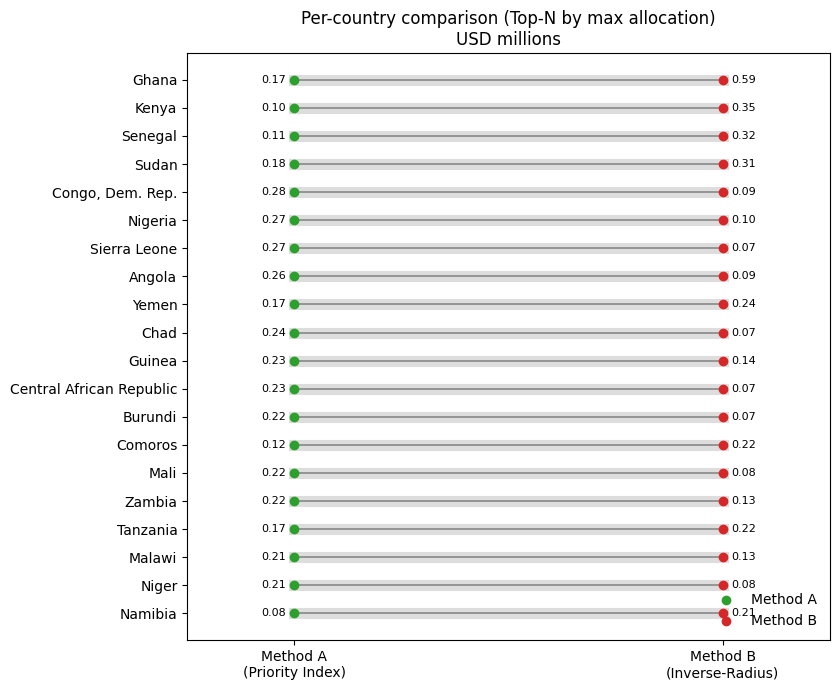

In [103]:
# (C) Slope chart: per-country Method A vs Method B (Top-N by total)
comp_slope = comp_top.sort_values("alloc_max", ascending=True).reset_index(drop=True)
plt.figure(figsize=(8.5, max(6, 0.35*len(comp_slope))))
y = np.arange(len(comp_slope))
A = comp_slope["alloc_priority_usd"]/1e6
B = comp_slope["alloc_radius_usd"]/1e6

for i in range(len(comp_slope)):
    plt.plot([0, 1], [y[i], y[i]], color="#ddd", lw=8, zorder=1)  # background bar
    plt.plot([0, 1], [y[i], y[i]], color="#888", lw=1.2, zorder=2) # thin line on top
    plt.scatter([0, 1], [y[i], y[i]], s=0)  # anchors

plt.scatter(np.zeros_like(y), y, s=0)  # anchors
plt.scatter(np.ones_like(y),  y, s=0)

plt.scatter(np.zeros_like(A), y, s=36, label="Method A", zorder=3)
plt.scatter(np.ones_like(B),  y, s=36, label="Method B", zorder=3)

# numeric labels
for i,(a,b) in enumerate(zip(A,B)):
    plt.text(-0.02, y[i], f"{a:.2f}", ha="right", va="center", fontsize=8)
    plt.text( 1.02, y[i], f"{b:.2f}", ha="left",  va="center", fontsize=8)

plt.yticks(y, comp_slope["country"])
plt.xticks([0,1], ["Method A\n(Priority Index)", "Method B\n(Inverse-Radius)"])
plt.title("Per-country comparison (Top-N by max allocation)\nUSD millions")
plt.legend(frameon=False, loc="lower right")
plt.xlim(-0.25, 1.25)
plt.tight_layout()
plt.show()